# Translating droplet verification case


![title](notebook-data/translating-droplet-3D-standalone-1.png)

A droplet is translated in a rectangular domain using a spatially constant internal and inlet velocity field. 

## Tests 

### 1 Translating droplet with varying density ratios without viscosity and surface tension 

#### Goal: Ensure the advection of the interface is consistent with the advection of the momentum

$\nabla \cdot(\rho \mathbf{v} \mathbf{v})$. To ensure this, the density in the new time step $\rho^{n+1}$ must be updated using the same flux $\rho_f^k \mathbf{v}_f^k \cdot \mathbf{S}_f$ that is used in the convective term of the momentum equation. See literature on multiphase momentum transport for varying density ratios. For this test case, viscosity and surface tension are set to $0$. 

In  other words, there should be no change in the mixture velocity if the mass flux in the momentum equation is also used to update the mixture density and of course the pressure stays the same $p=0$. 

### 2 Translating droplet with varying density ratios 

#### Ensure the forces are balanced on the interface for an interface that moves in the simplest way - by translation

This is tested in the case where kinematic viscosity is $\nu \ne 0$ and the surface tension force $\mathbf{f}_\sigma \ne \mathbf{0}$.

# 1 Translating droplet with varying density ratios without viscosity and surface tension 

In [1]:
#import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import sys
sys.path.append(os.environ['ARGO_PYTHON_MODULES'])
from nbplt_Trans_output import plot_dframe

import os
if (not(os.path.exists('figures'))):
    os.mkdir('figures')

idx = pd.IndexSlice
        
def densityRatioInfluence_plot(case_path):
    rcParams["figure.dpi"] = 300
    study_name = "densityRatioInfluence.parameter"
    case_0_path = case_path + study_name + "_00000_template_copy_block"
    density_ratio_agglom  = datglom.data_agglomerator(study_name, 
                                                  case_0_path,
                                                  "stationaryDropletResults.csv") 
 
    density_ratio_df = density_ratio_agglom.study_dataframe() 
    

    plotDict={"x" : "time", "xsymb" : r"$t$", 
          "y" : "Linf velocity error", 
          "ysymb" : r"$L_\infty(\mathbf{v})$",
          "resolution" : r"$N$", "rho_droplet" : r"$\rho_1$", 
          "nu_droplet" : r"$\nu_1$"};
    plot_dframe(density_ratio_df, density_ratio_agglom,case_path,study_name, 
            title="All density ratios", 
            plotDict=plotDict, ncol=2)
    return density_ratio_df

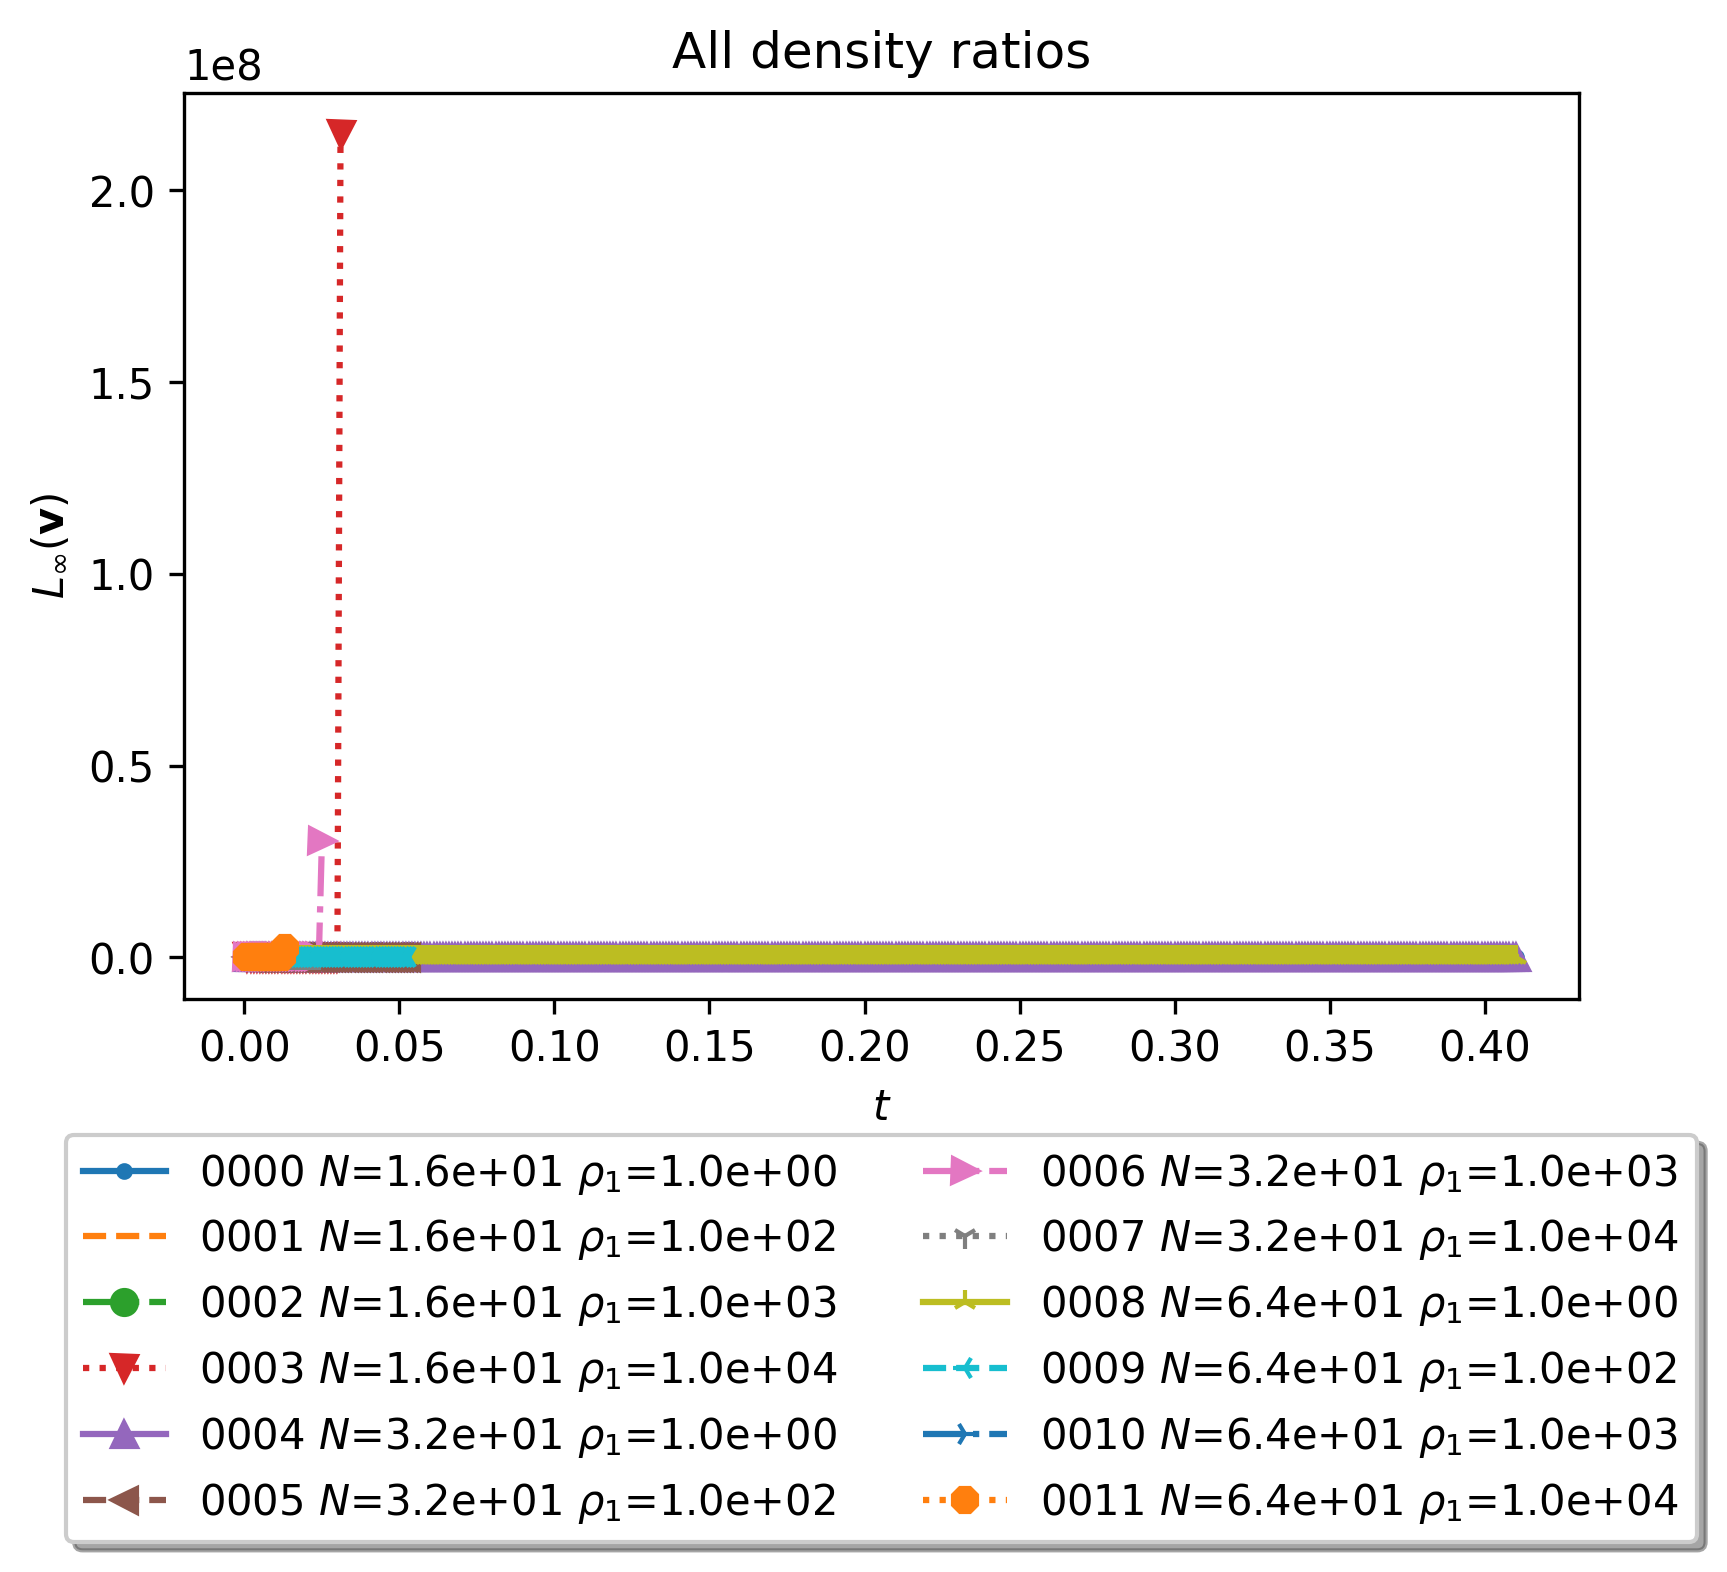

In [2]:
df=densityRatioInfluence_plot("noRhoEquation/withMomentumPredictor/limitedLinearV1/")

In [12]:
df.loc[idx[[16,32,64],[1000],:]]#["rho_droplet"]#df[df["rho_droplet"]==1.0]

front volume  capillary number (droplet)  \
resolution rho_droplet step                                             
16         1000.0      0         0.000000                           0   
                       1         0.000119                           0   
                       2         0.000347                           0   
                       3         0.000674                           0   
                       4         0.001092                           0   
...                                   ...                         ...   
64         1000.0      6         0.007203                           0   
                       7         0.009204                           0   
                       8         0.011671                           0   
                       9         0.014584                           0   
                       10        4.756210                           0   

                             Max mag(U) cell ID  density ratio  \
resolution rho_droplet step                                      
16         1000.0      0                   2406           1000   
                       1                   2406           1000   
                       2                   2406           1000   
                       3                   2406           1000   
                       4                   2406           1000   
...                                         ...            ...   
64         1000.0      6                 161824           1000   
                       7                 174048           1000   
                       8                 170015           1000   
                       9                 165987           1000   
                       10                101215           1000   

                             max delta P error  L2 velocity error  \
resolution rho_droplet step                                         
16         1000.0      0          2.420130e+17           0.011966   
                       1          2.509880e+17           0.023262   
                       2          2.580580e+17           0.034100   
                       3          2.645390e+17           0.044427   
                       4          2.710680e+17           0.054255   
...                                        ...                ...   
64         1000.0      6          2.296930e+19           0.214853   
                       7          7.367210e+19           1.007850   
                       8          2.694070e+20           0.739965   
                       9          1.649270e+23          93.345500   
                       10         8.323910e+24         240.313000   

                             Linf velocity error  Linf droplet velocity error  \
resolution rho_droplet step                                                     
16         1000.0      0                0.133135                     0.013555   
                       1                0.268894                     0.026612   
                       2                0.403423                     0.039252   
                       3                0.534168                     0.051529   
                       4                0.661136                     0.063483   
...                                          ...                          ...   
64         1000.0      6               34.183700                     1.149540   
                       7              219.194000                     0.745093   
                       8              129.159000                     0.602118   
                       9            18248.600000                    71.499900   
                       10           43114.300000                   893.466000   

                              time  capillary number (whole domain)         h  \
resolution rho_droplet step                                                     
16         1000.0      0     0.001                                0  0.063158   
                       1 

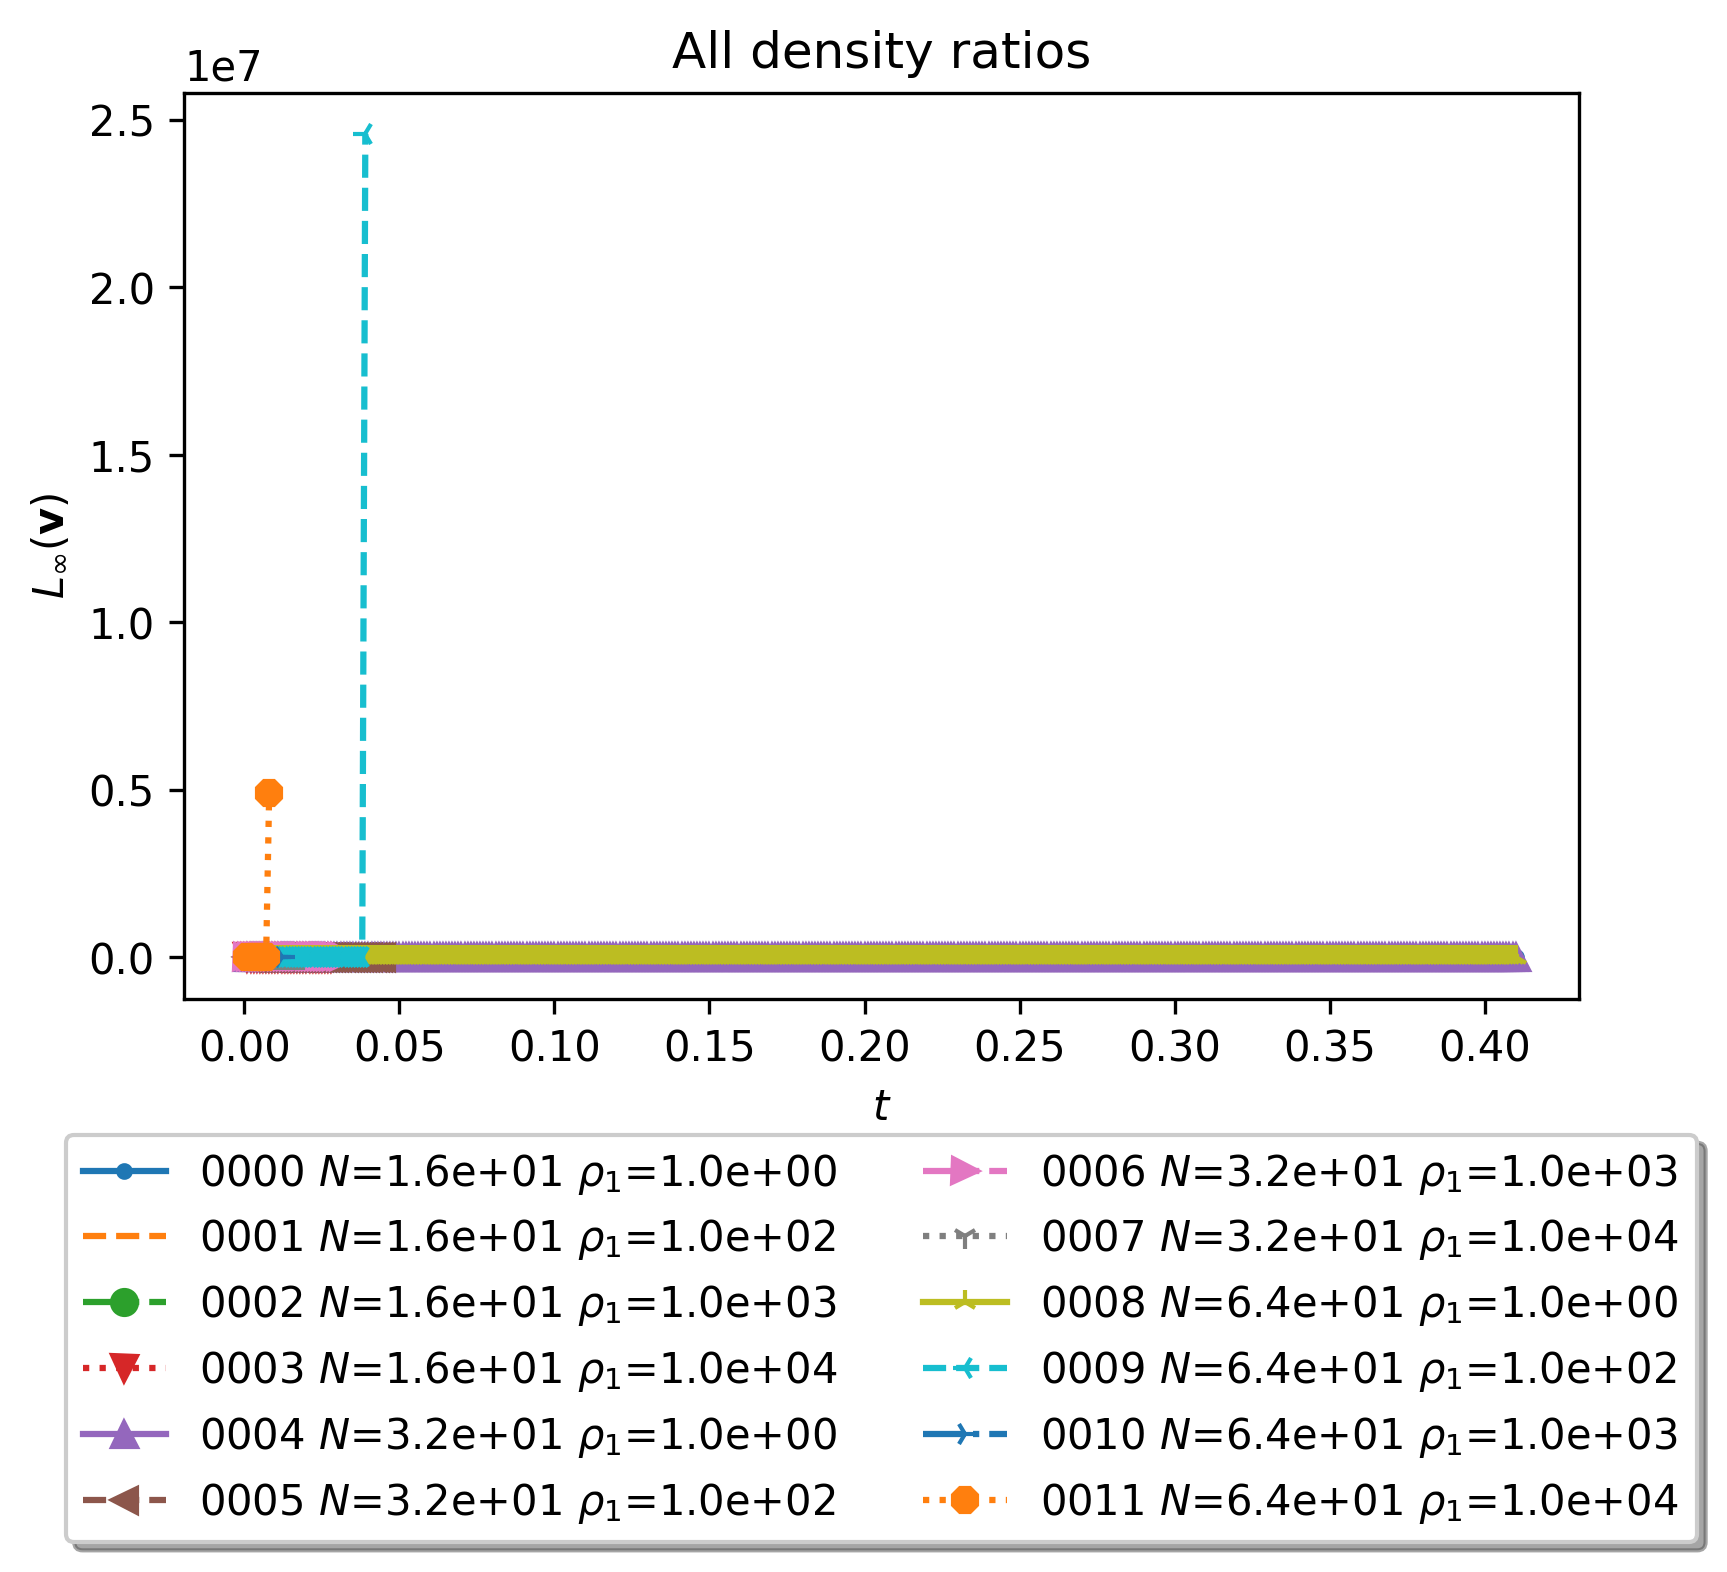

In [11]:
densityRatioInfluence_plot("noRhoEquation/withMomentumPredictor/limitedLinearV0.5/")

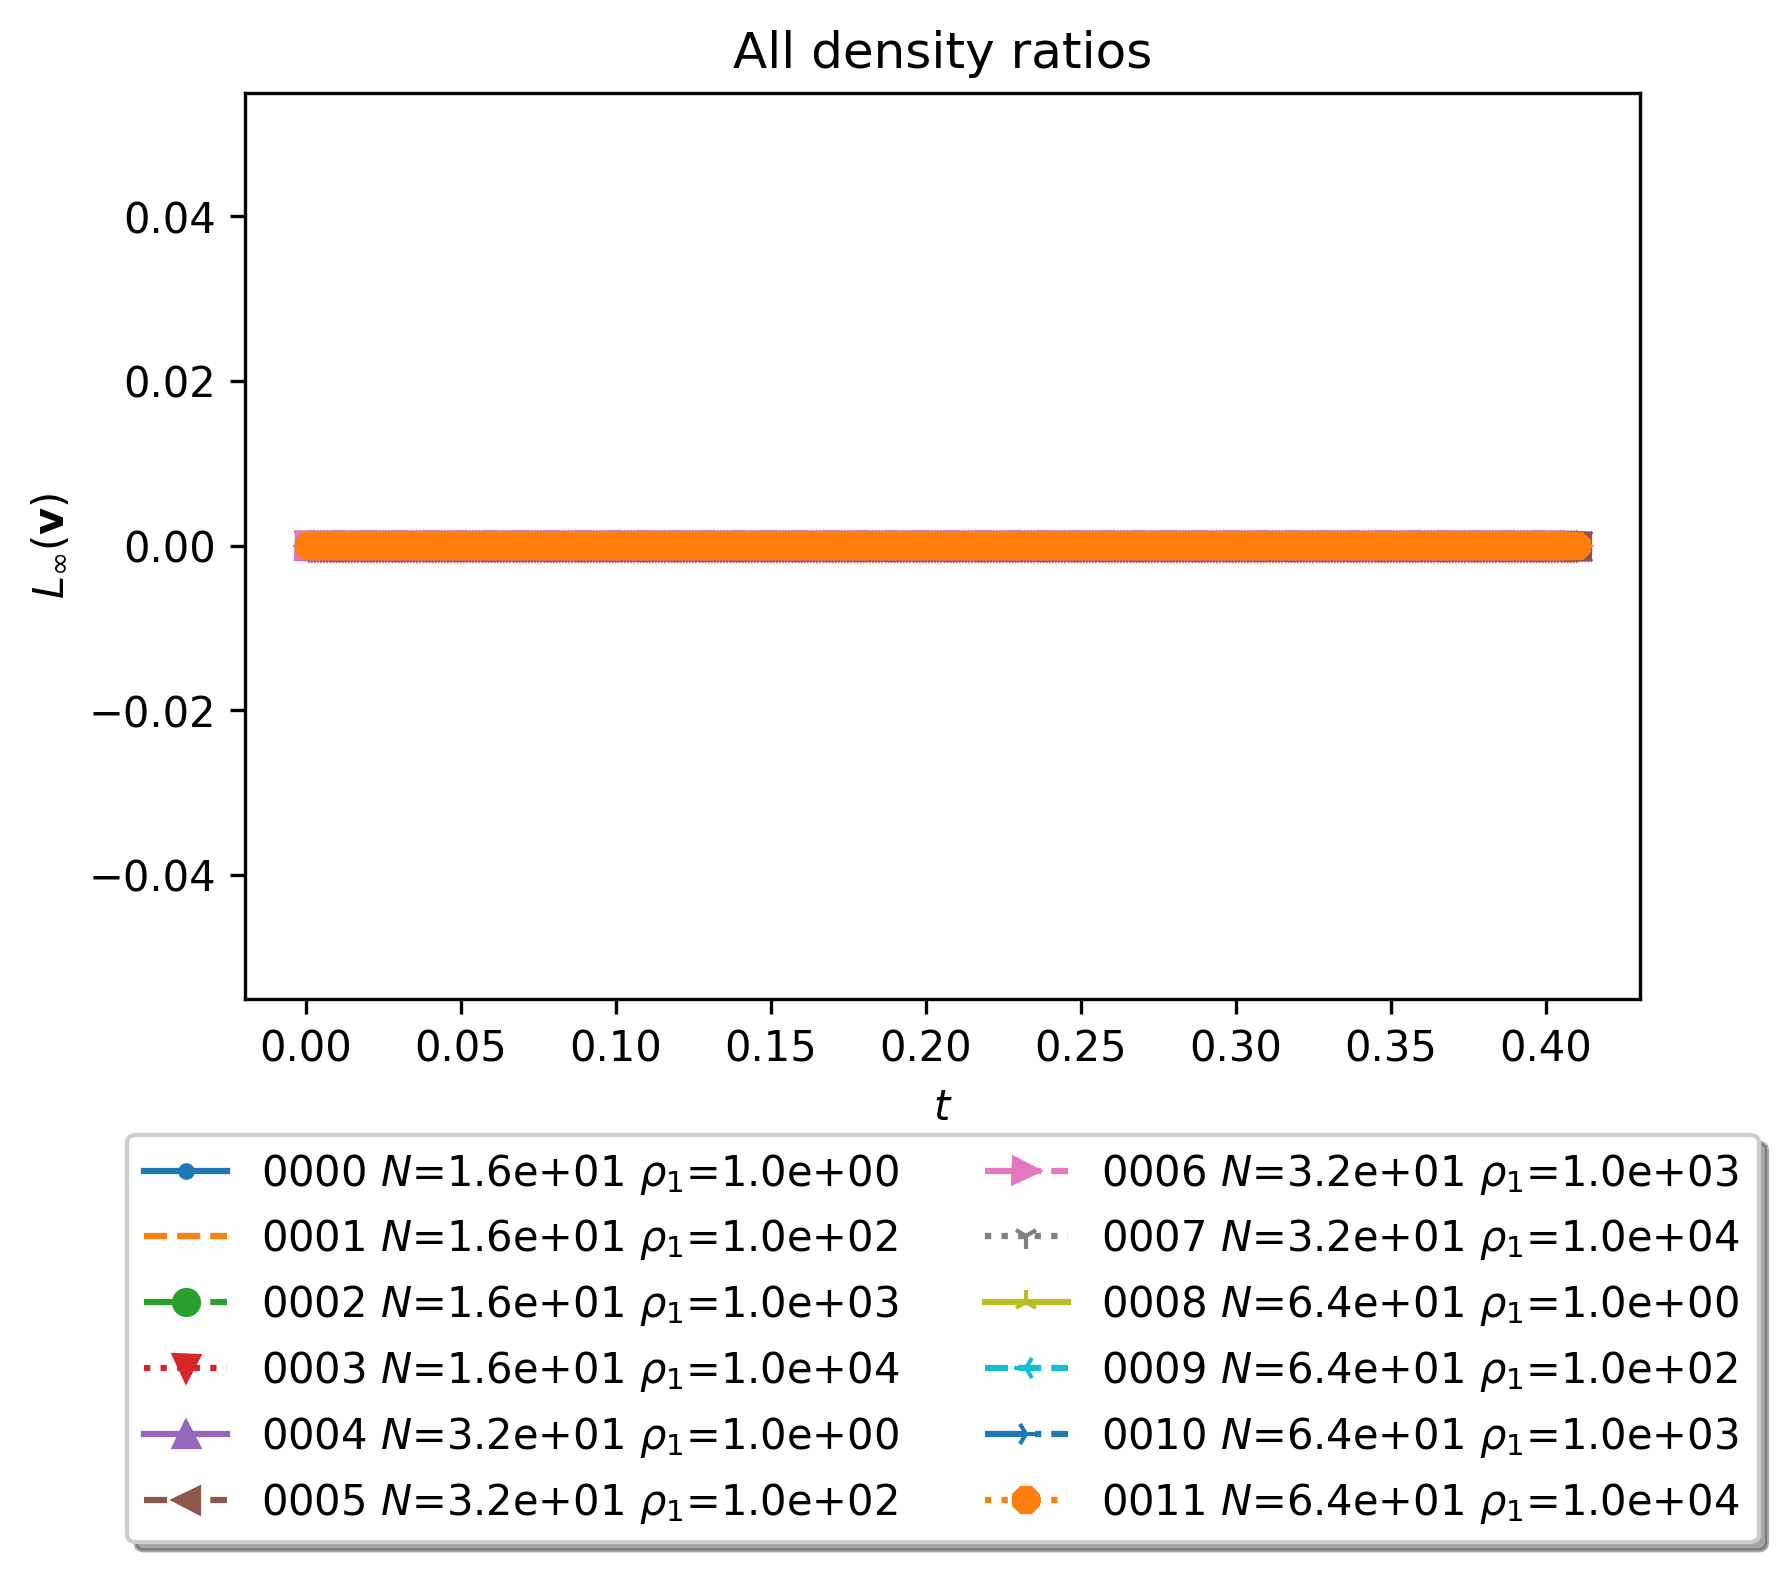

In [12]:
densityRatioInfluence_plot("withRhoEquation/withMomentumPredictor/limitedLinearV0/")

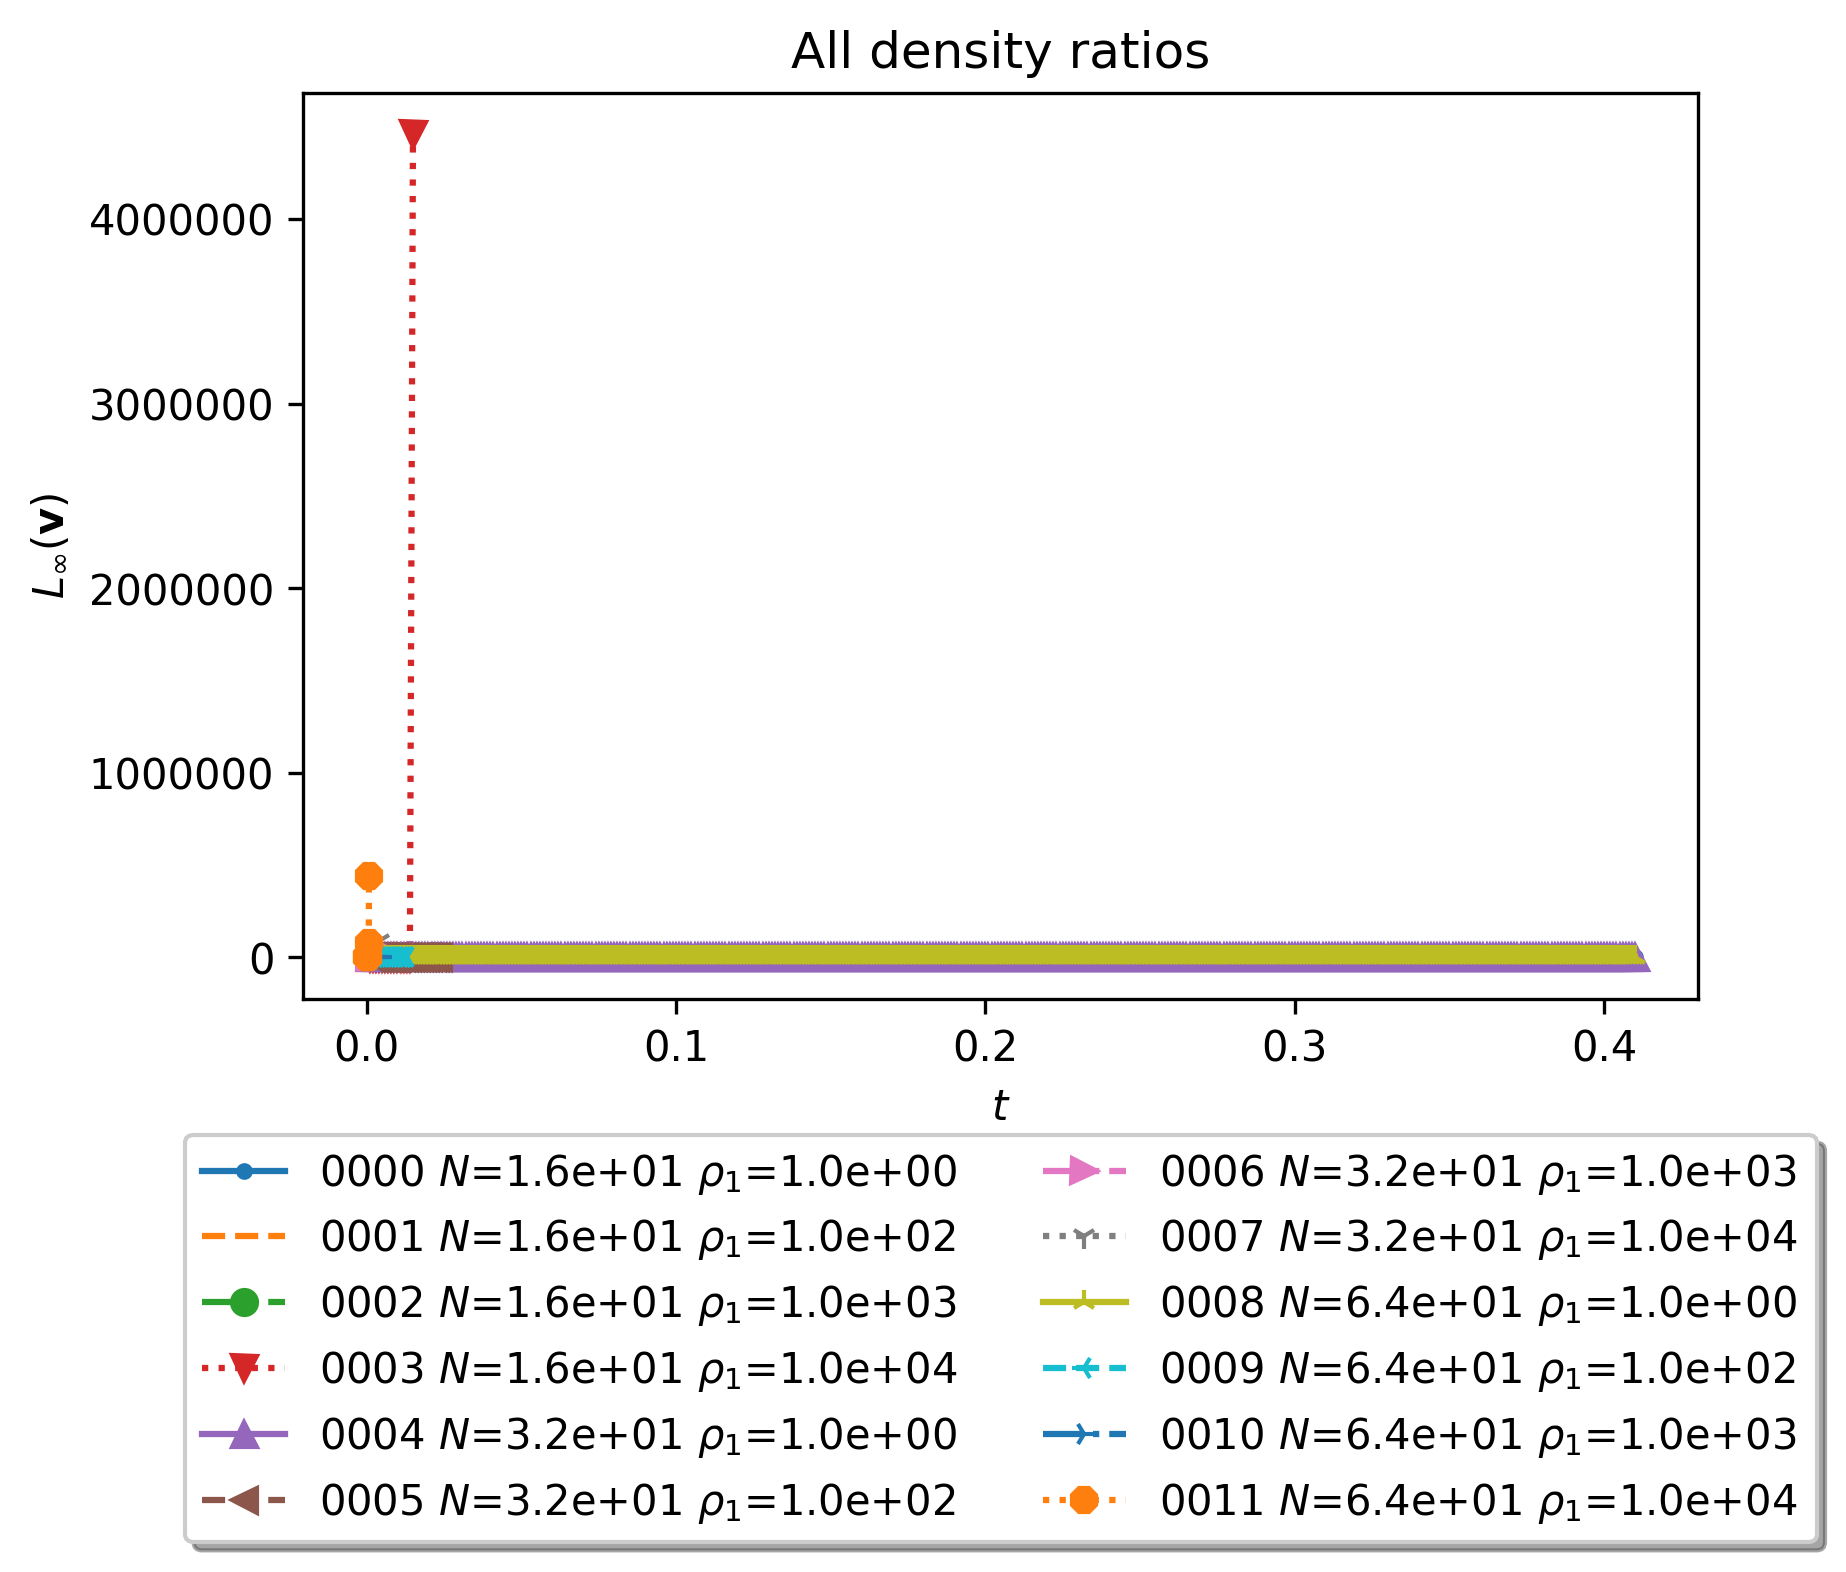

In [13]:
densityRatioInfluence_plot("noRhoEquation/withMomentumPredictor/limitedLinearV0/")

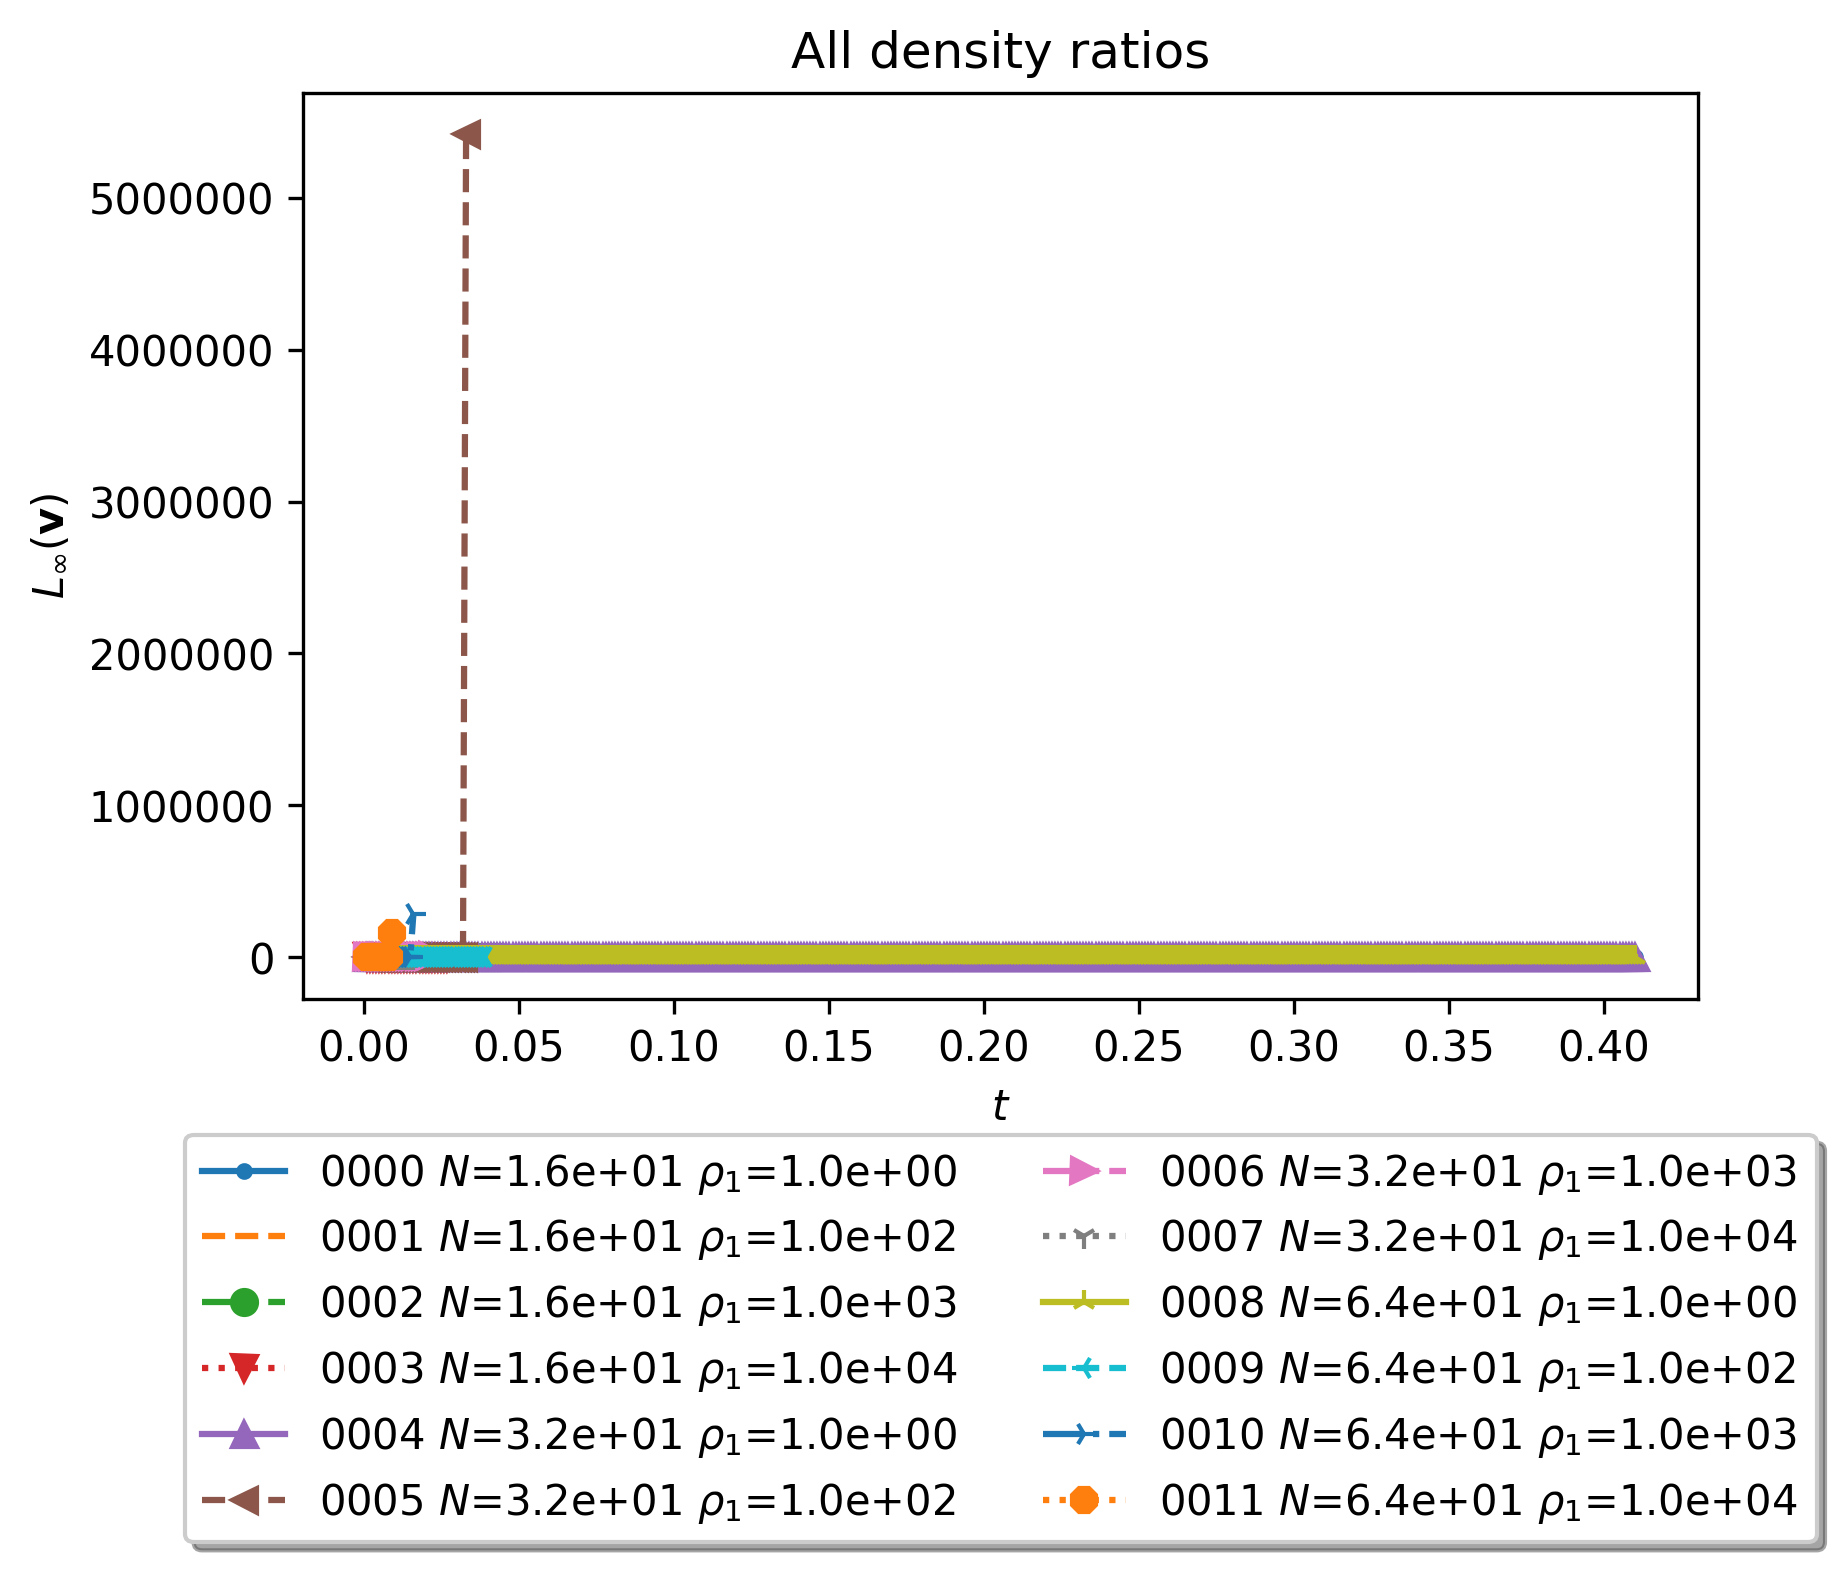

In [17]:
densityRatioInfluence_plot("noRhoEquation/noMomentumPredictor/limitedLinearV0.5/")

In [ ]:
# rcParams["figure.dpi"] = 200
# idx = pd.IndexSlice
# plot_dframe(density_ratio_df.loc[idx[[16,32,64],[1,100,1000],:]], density_ratio_agglom, 
#             title="Density ratios 1 - 1000", 
#             plotDict=plotDict)

# 2 Translating droplet with varying density ratios, viscosity and surface tension

Popinet, Stéphane., "An accurate adaptive solver for surface-tension-driven
interfacial flows.", Journal of Computational Physics 228.16 (2009): 5838-5866.                                                                                                                            

Abadie, Thomas, Joelle Aubin, and Dominique Legendre, "On the combined effects
of surface tension force calculation and interface advection on spurious
currents within Volume of Fluid and Level Set frameworks." Journal of
Computational Physics 297 (2015): 611-636.           

In [20]:
def popinet2009_plot(case_path):
    rcParams["figure.dpi"] = 300
    study_name = "popinet2009.parameter"
    case_0_path = case_path + study_name + "_00000_template_copy_block"
    popinet2009_agglom  = datglom.data_agglomerator(study_name, 
                                                  case_0_path,
                                                  "stationaryDropletResults.csv") 
 
    popinet2009_df = popinet2009_agglom.study_dataframe() 

    plotDict={"x" : "time", "xsymb" : r"$t$", 
          "y" : "Linf velocity error", 
          "ysymb" : r"$L_\infty(\mathbf{v})$",
          "resolution" : r"$N$", "rho_droplet" : r"$\rho_1$", 
          "nu_droplet" : r"$\nu_1$"};
    plot_dframe(popinet2009_df, popinet2009_agglom,case_path,study_name, 
            title="All density ratios", 
            plotDict=plotDict)

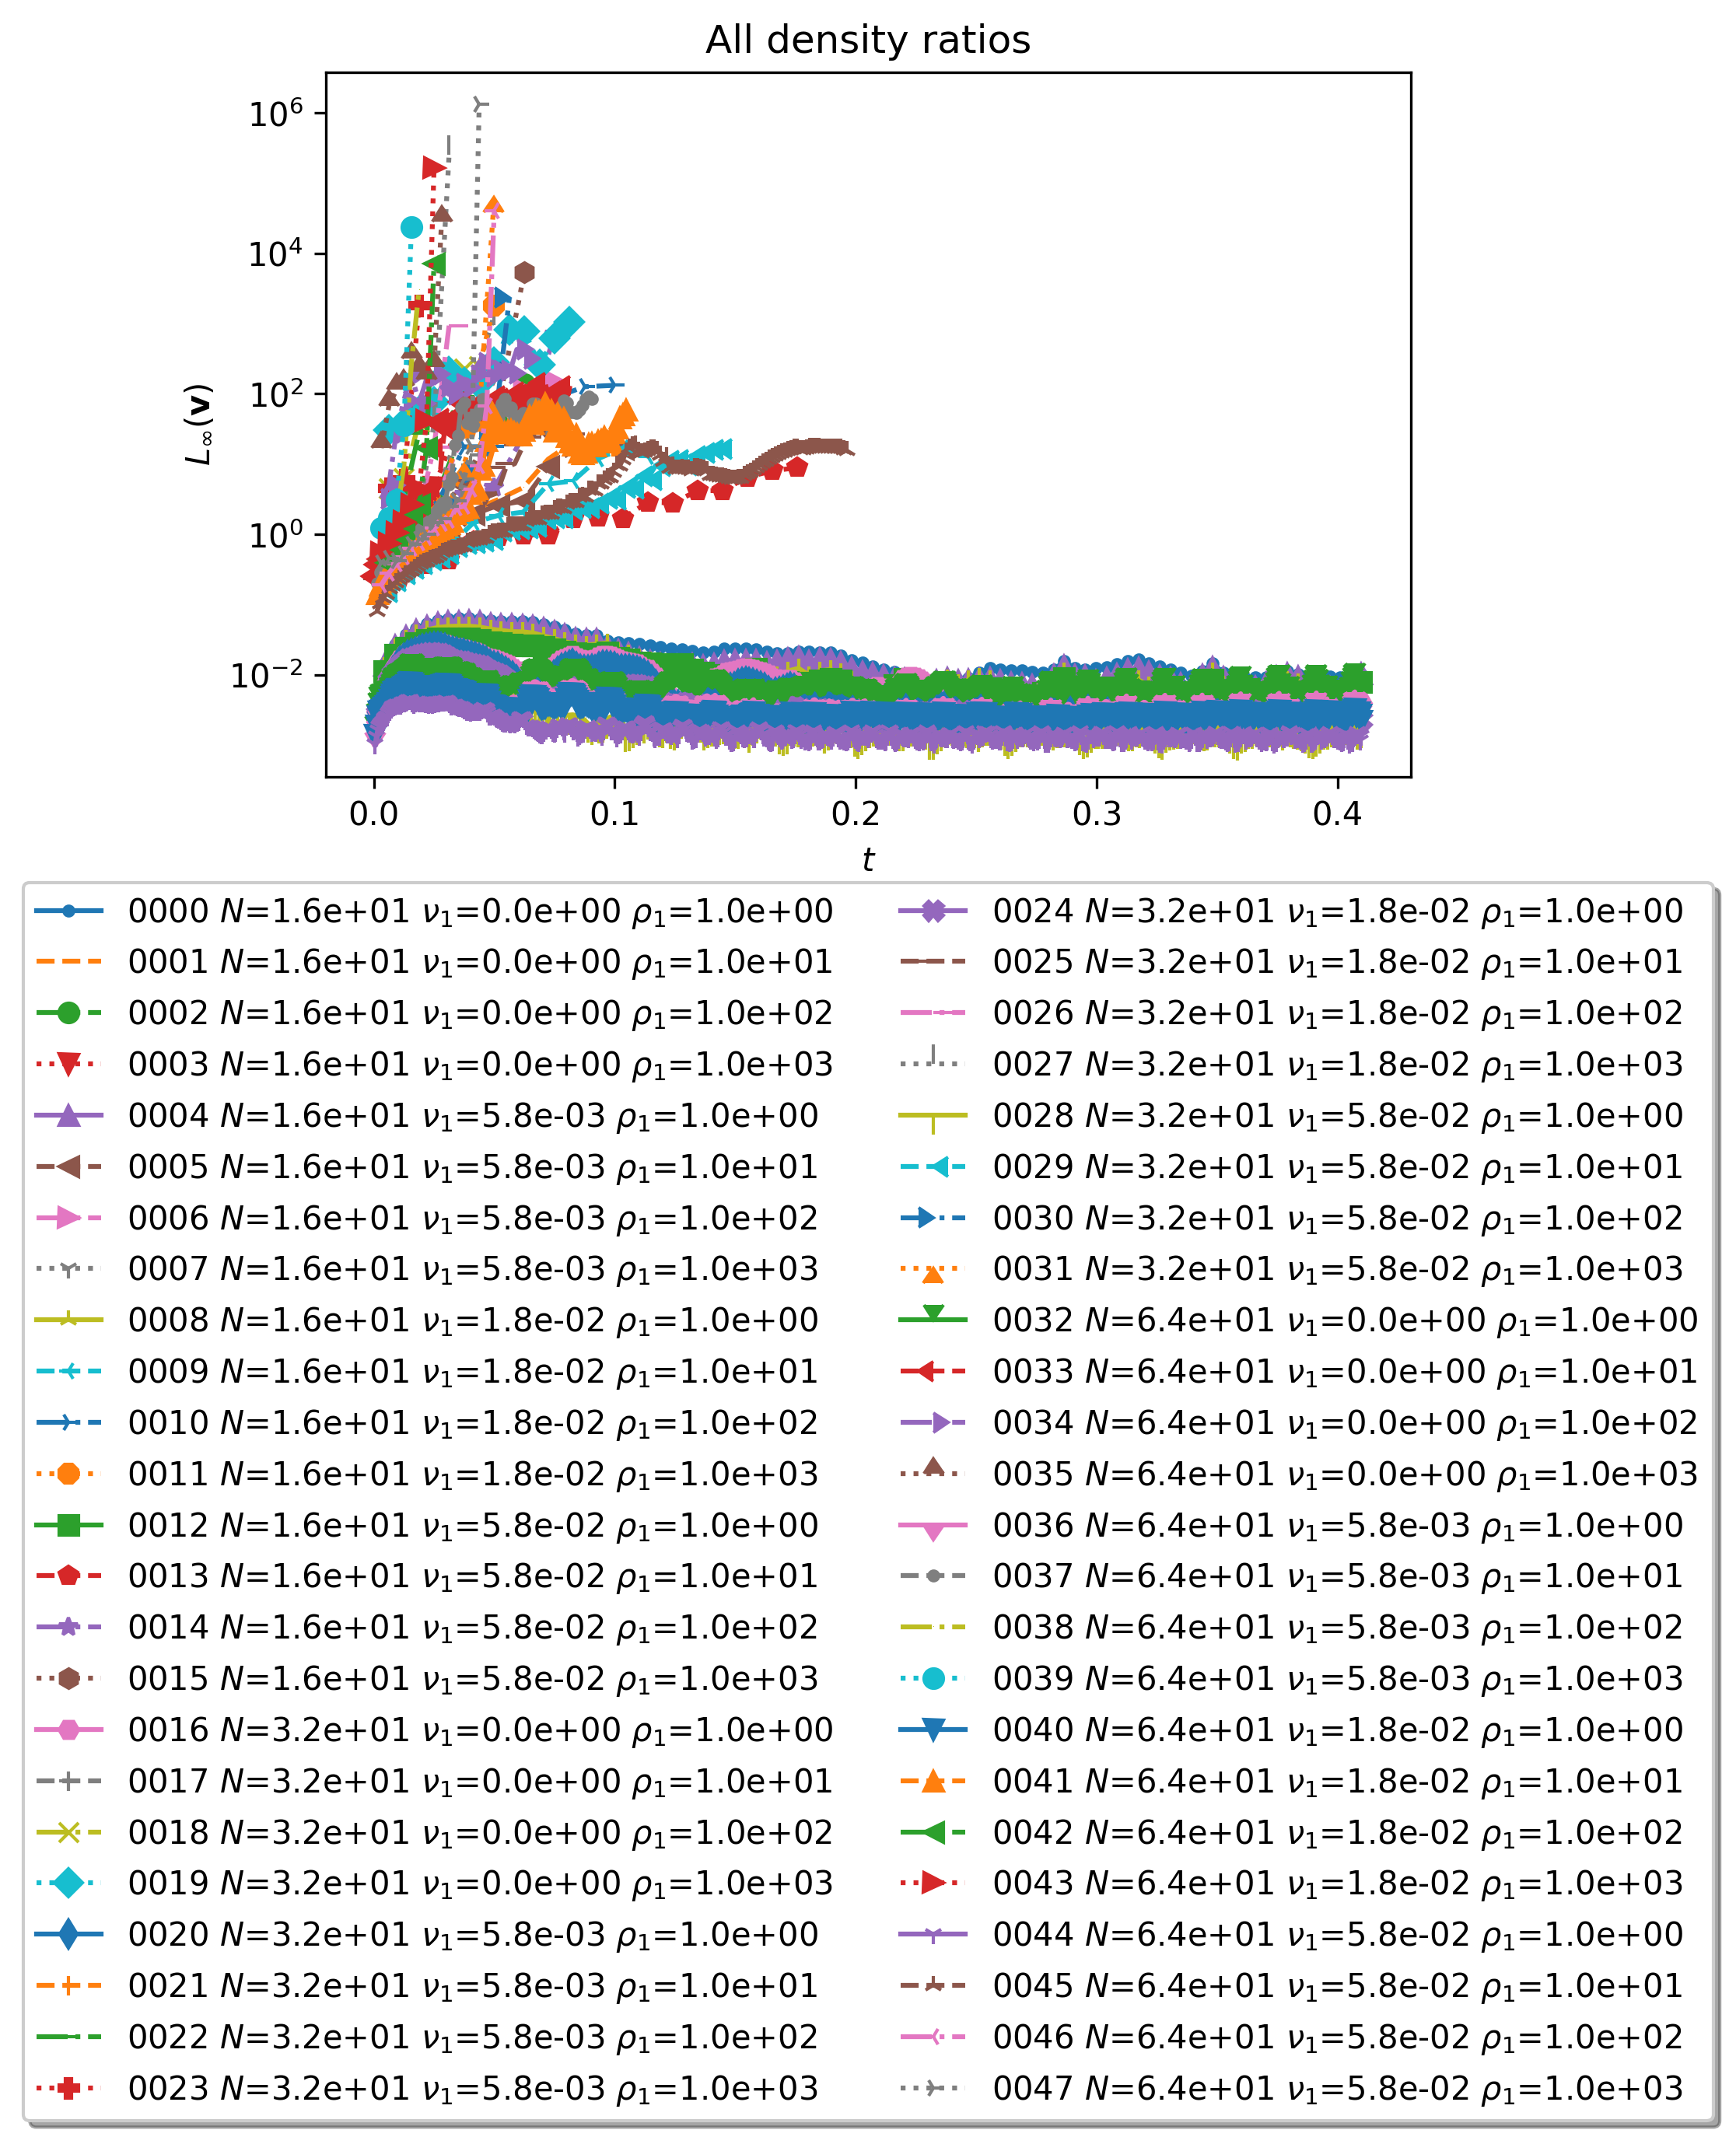

In [22]:
popinet2009_plot("noRhoEquation/withMomentumPredictor/limitedLinearV1/")

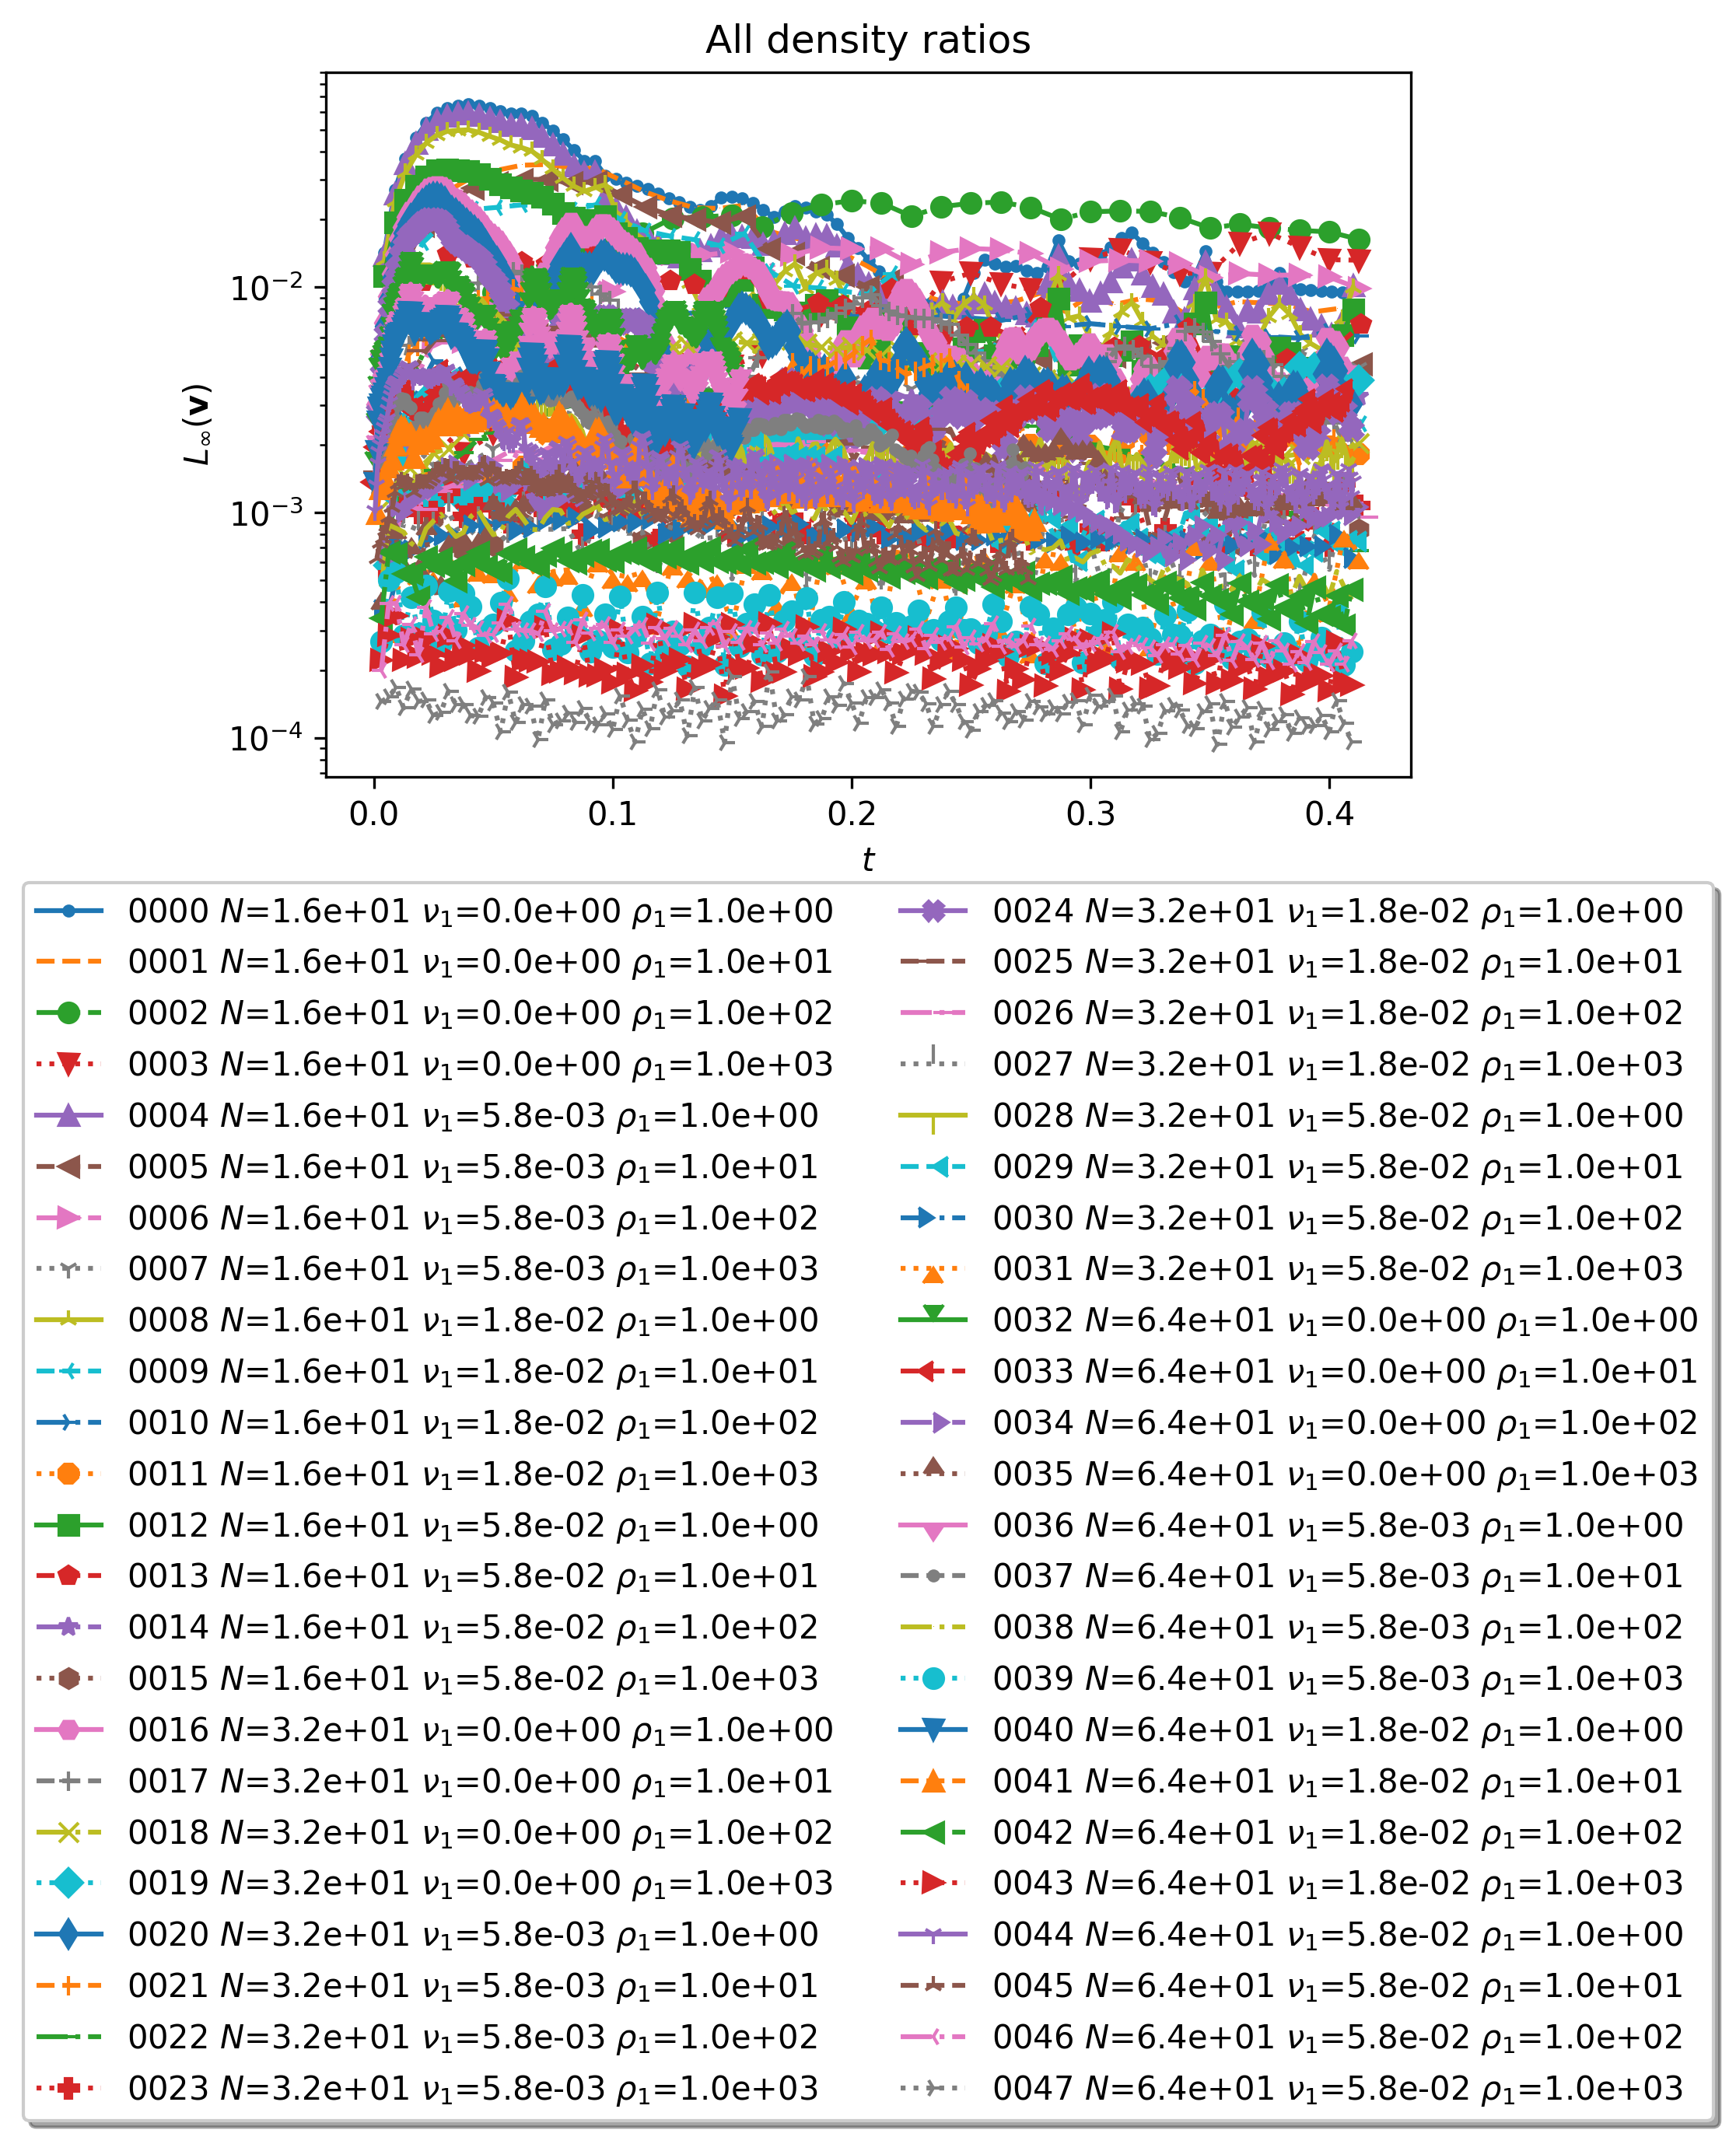

In [25]:
popinet2009_plot("withRhoEquation/withMomentumPredictor/limitedLinearV0/")

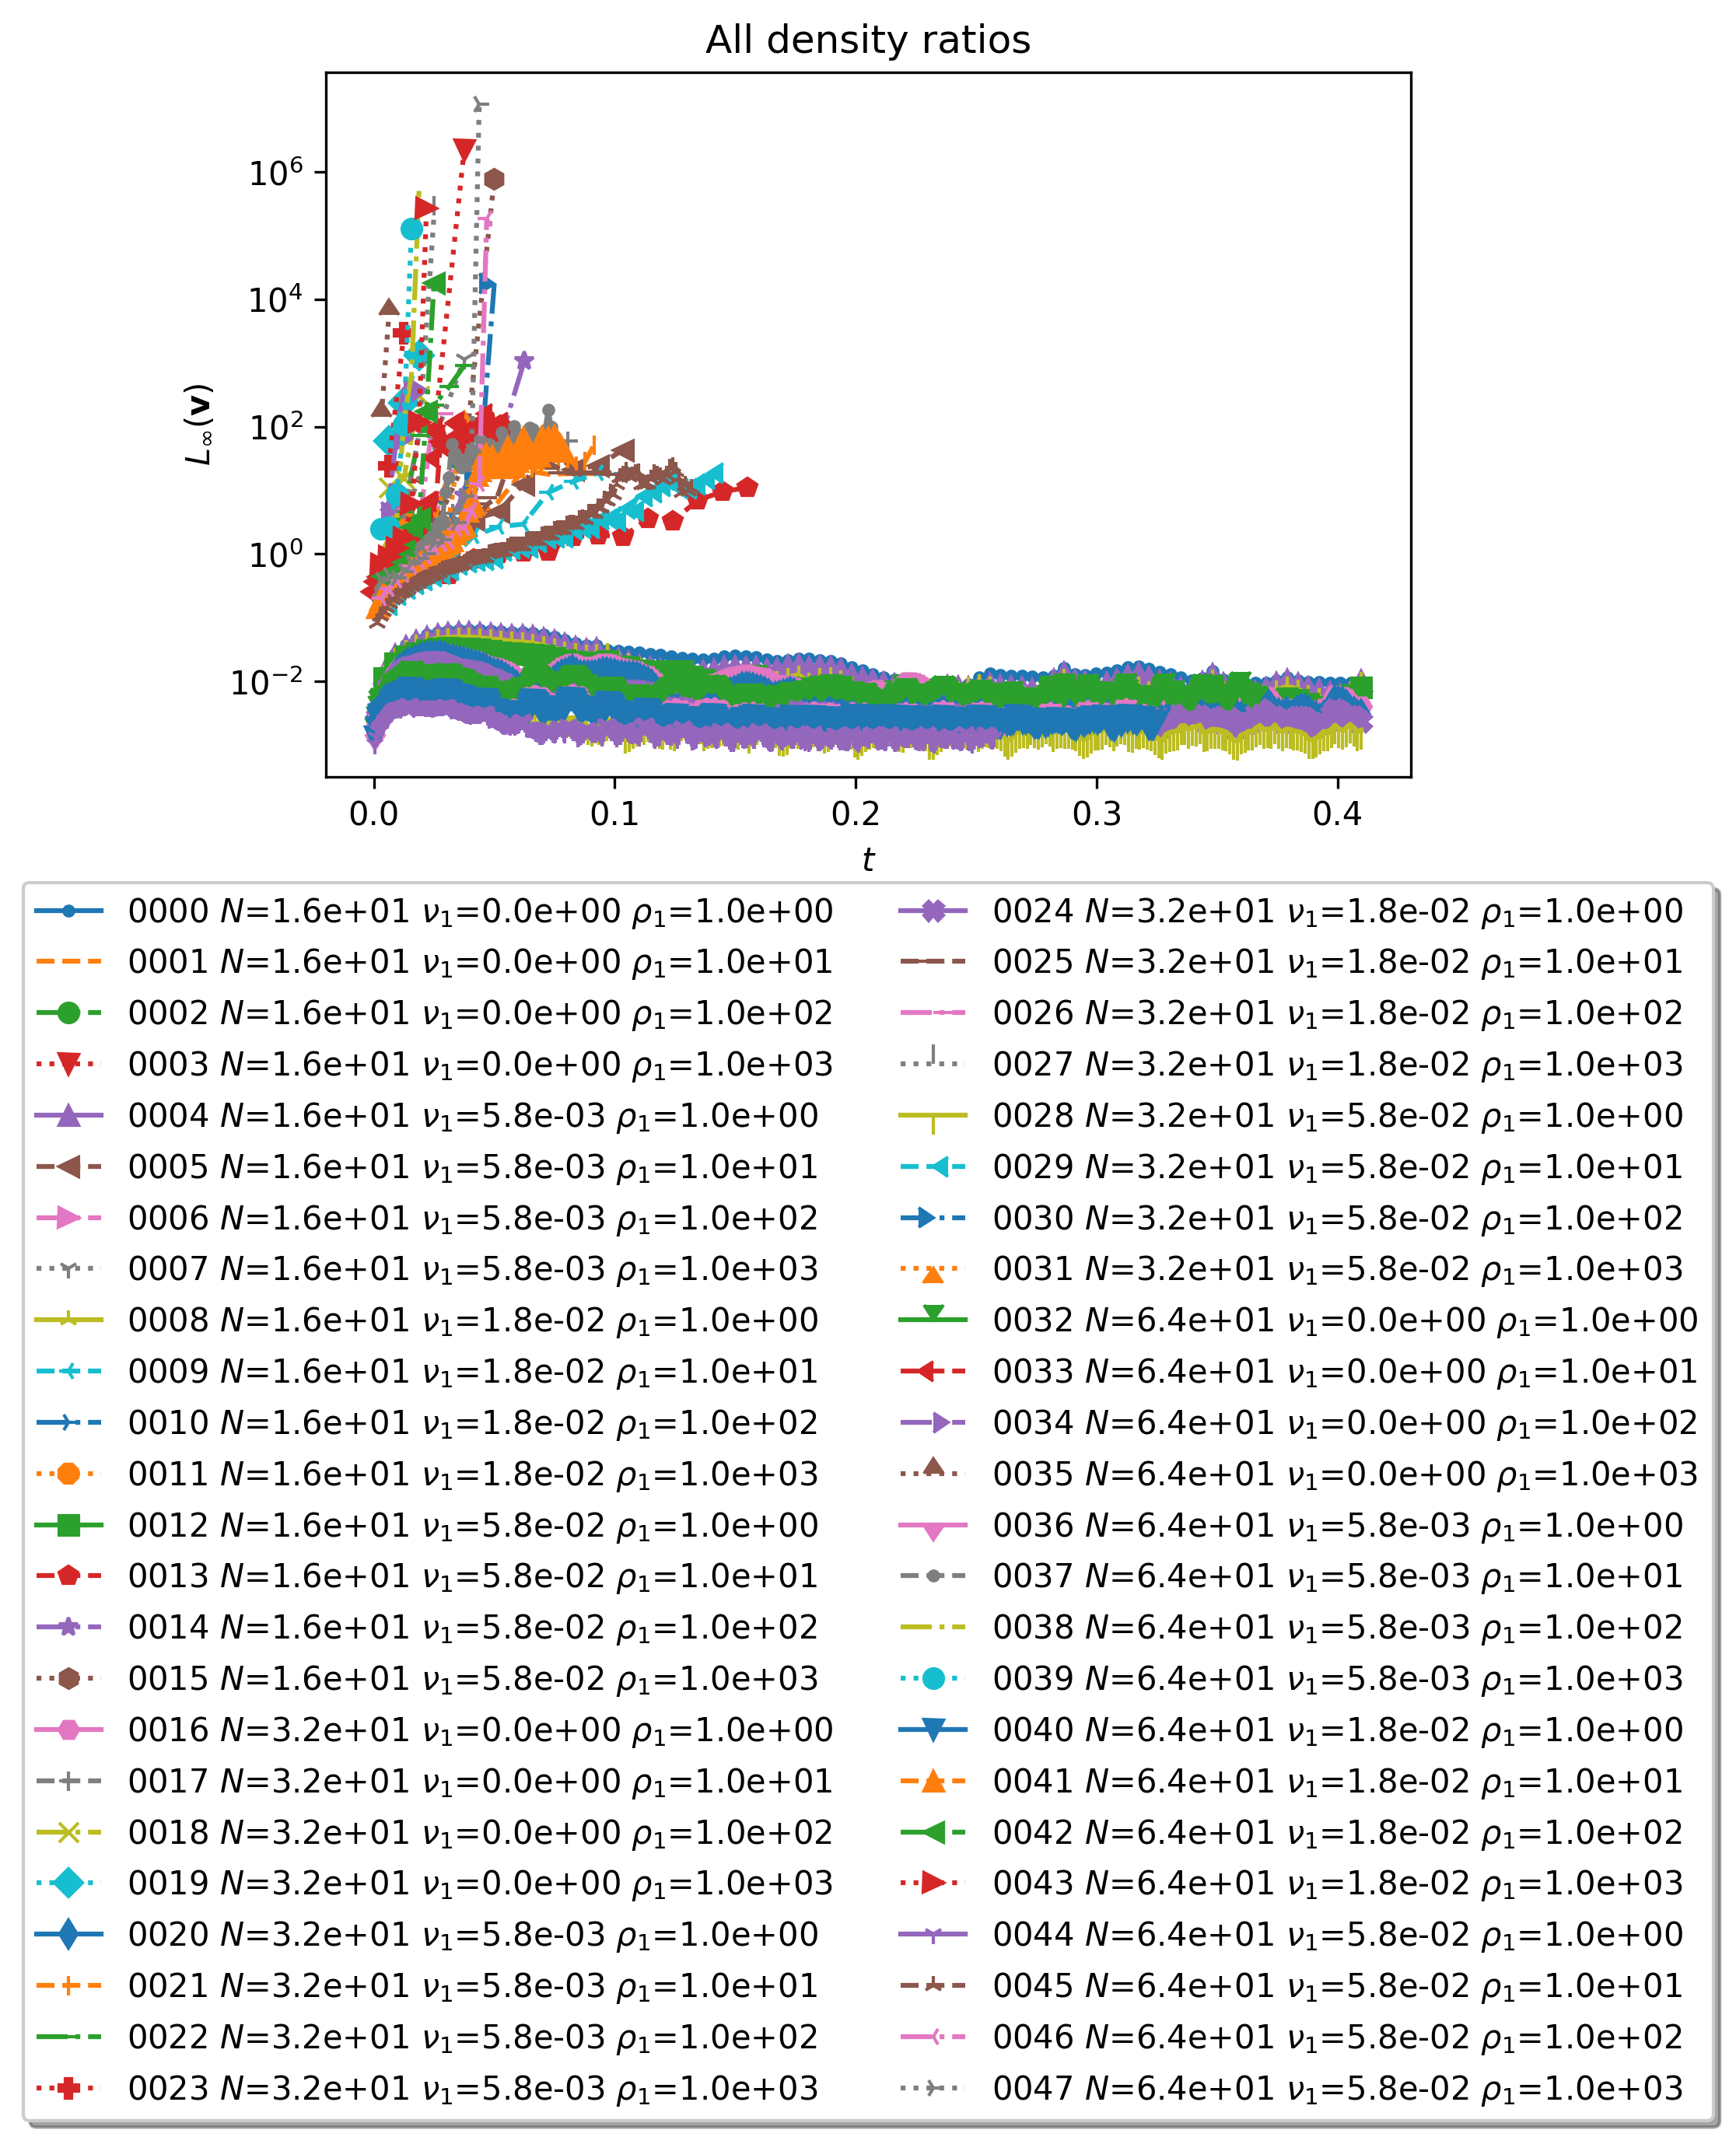

In [26]:
popinet2009_plot("noRhoEquation/withMomentumPredictor/limitedLinearV0/")

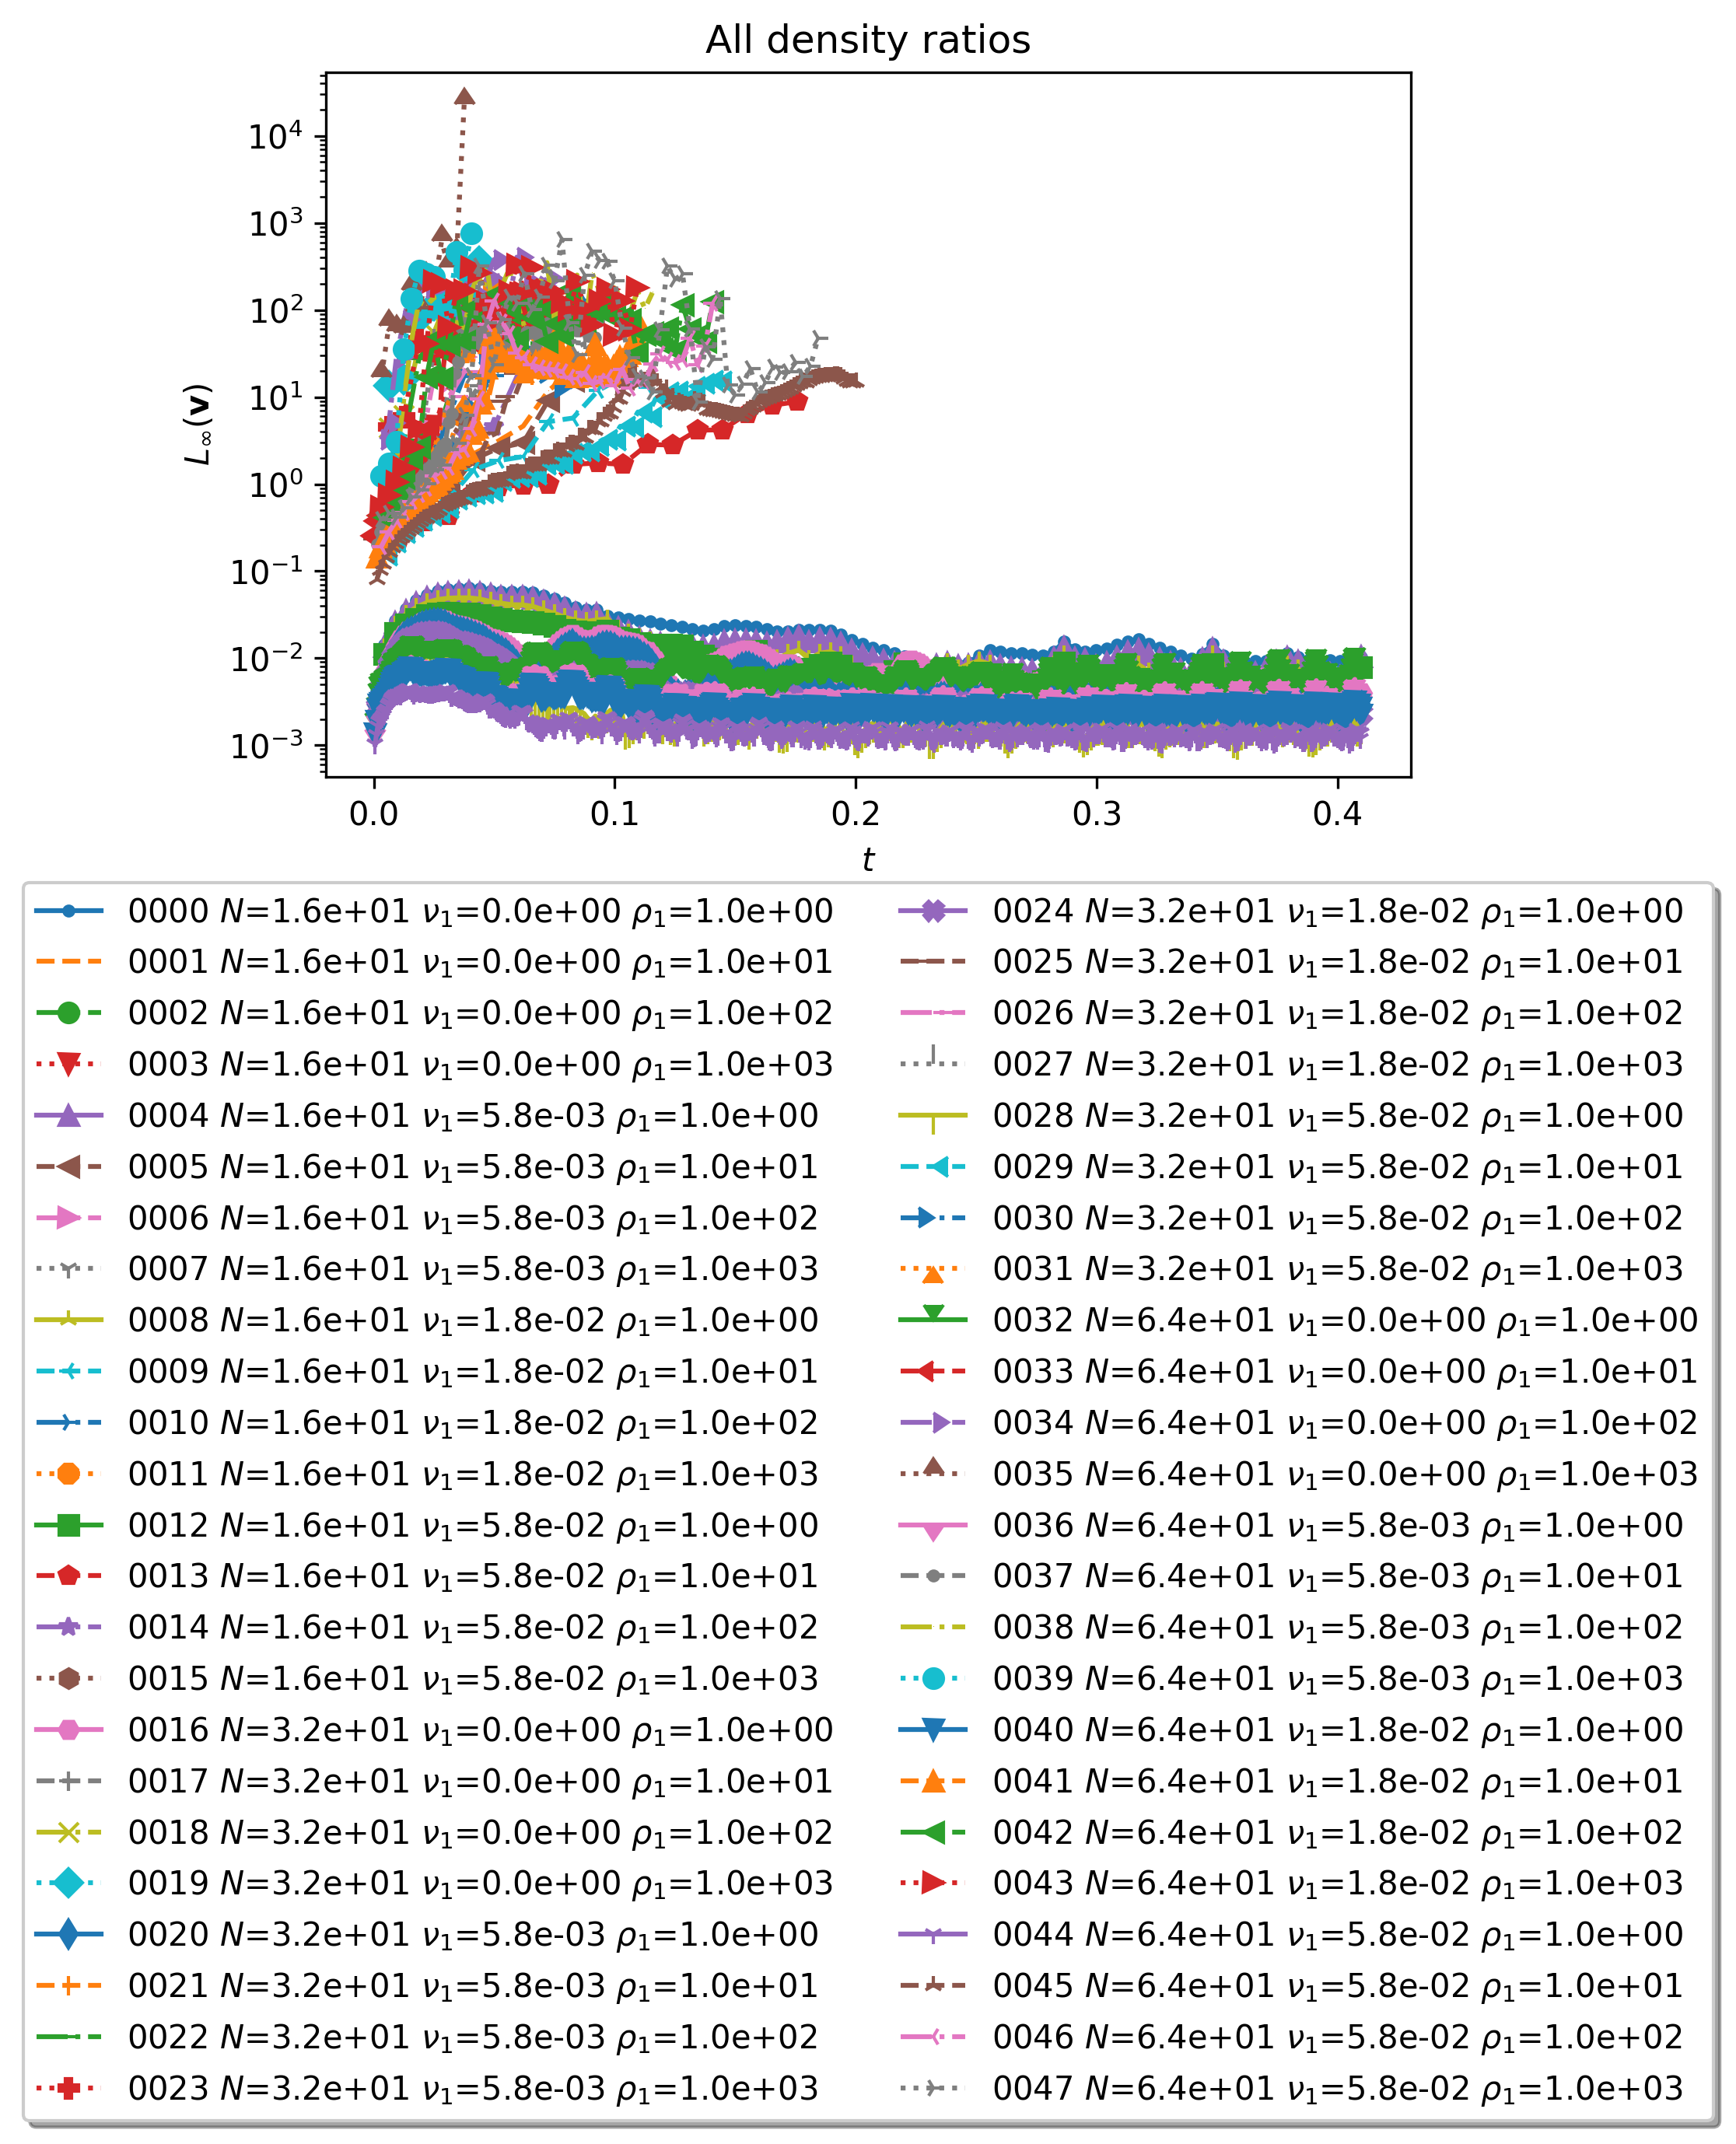

In [28]:
popinet2009_plot("noRhoEquation/noMomentumPredictor/limitedLinearV1/")

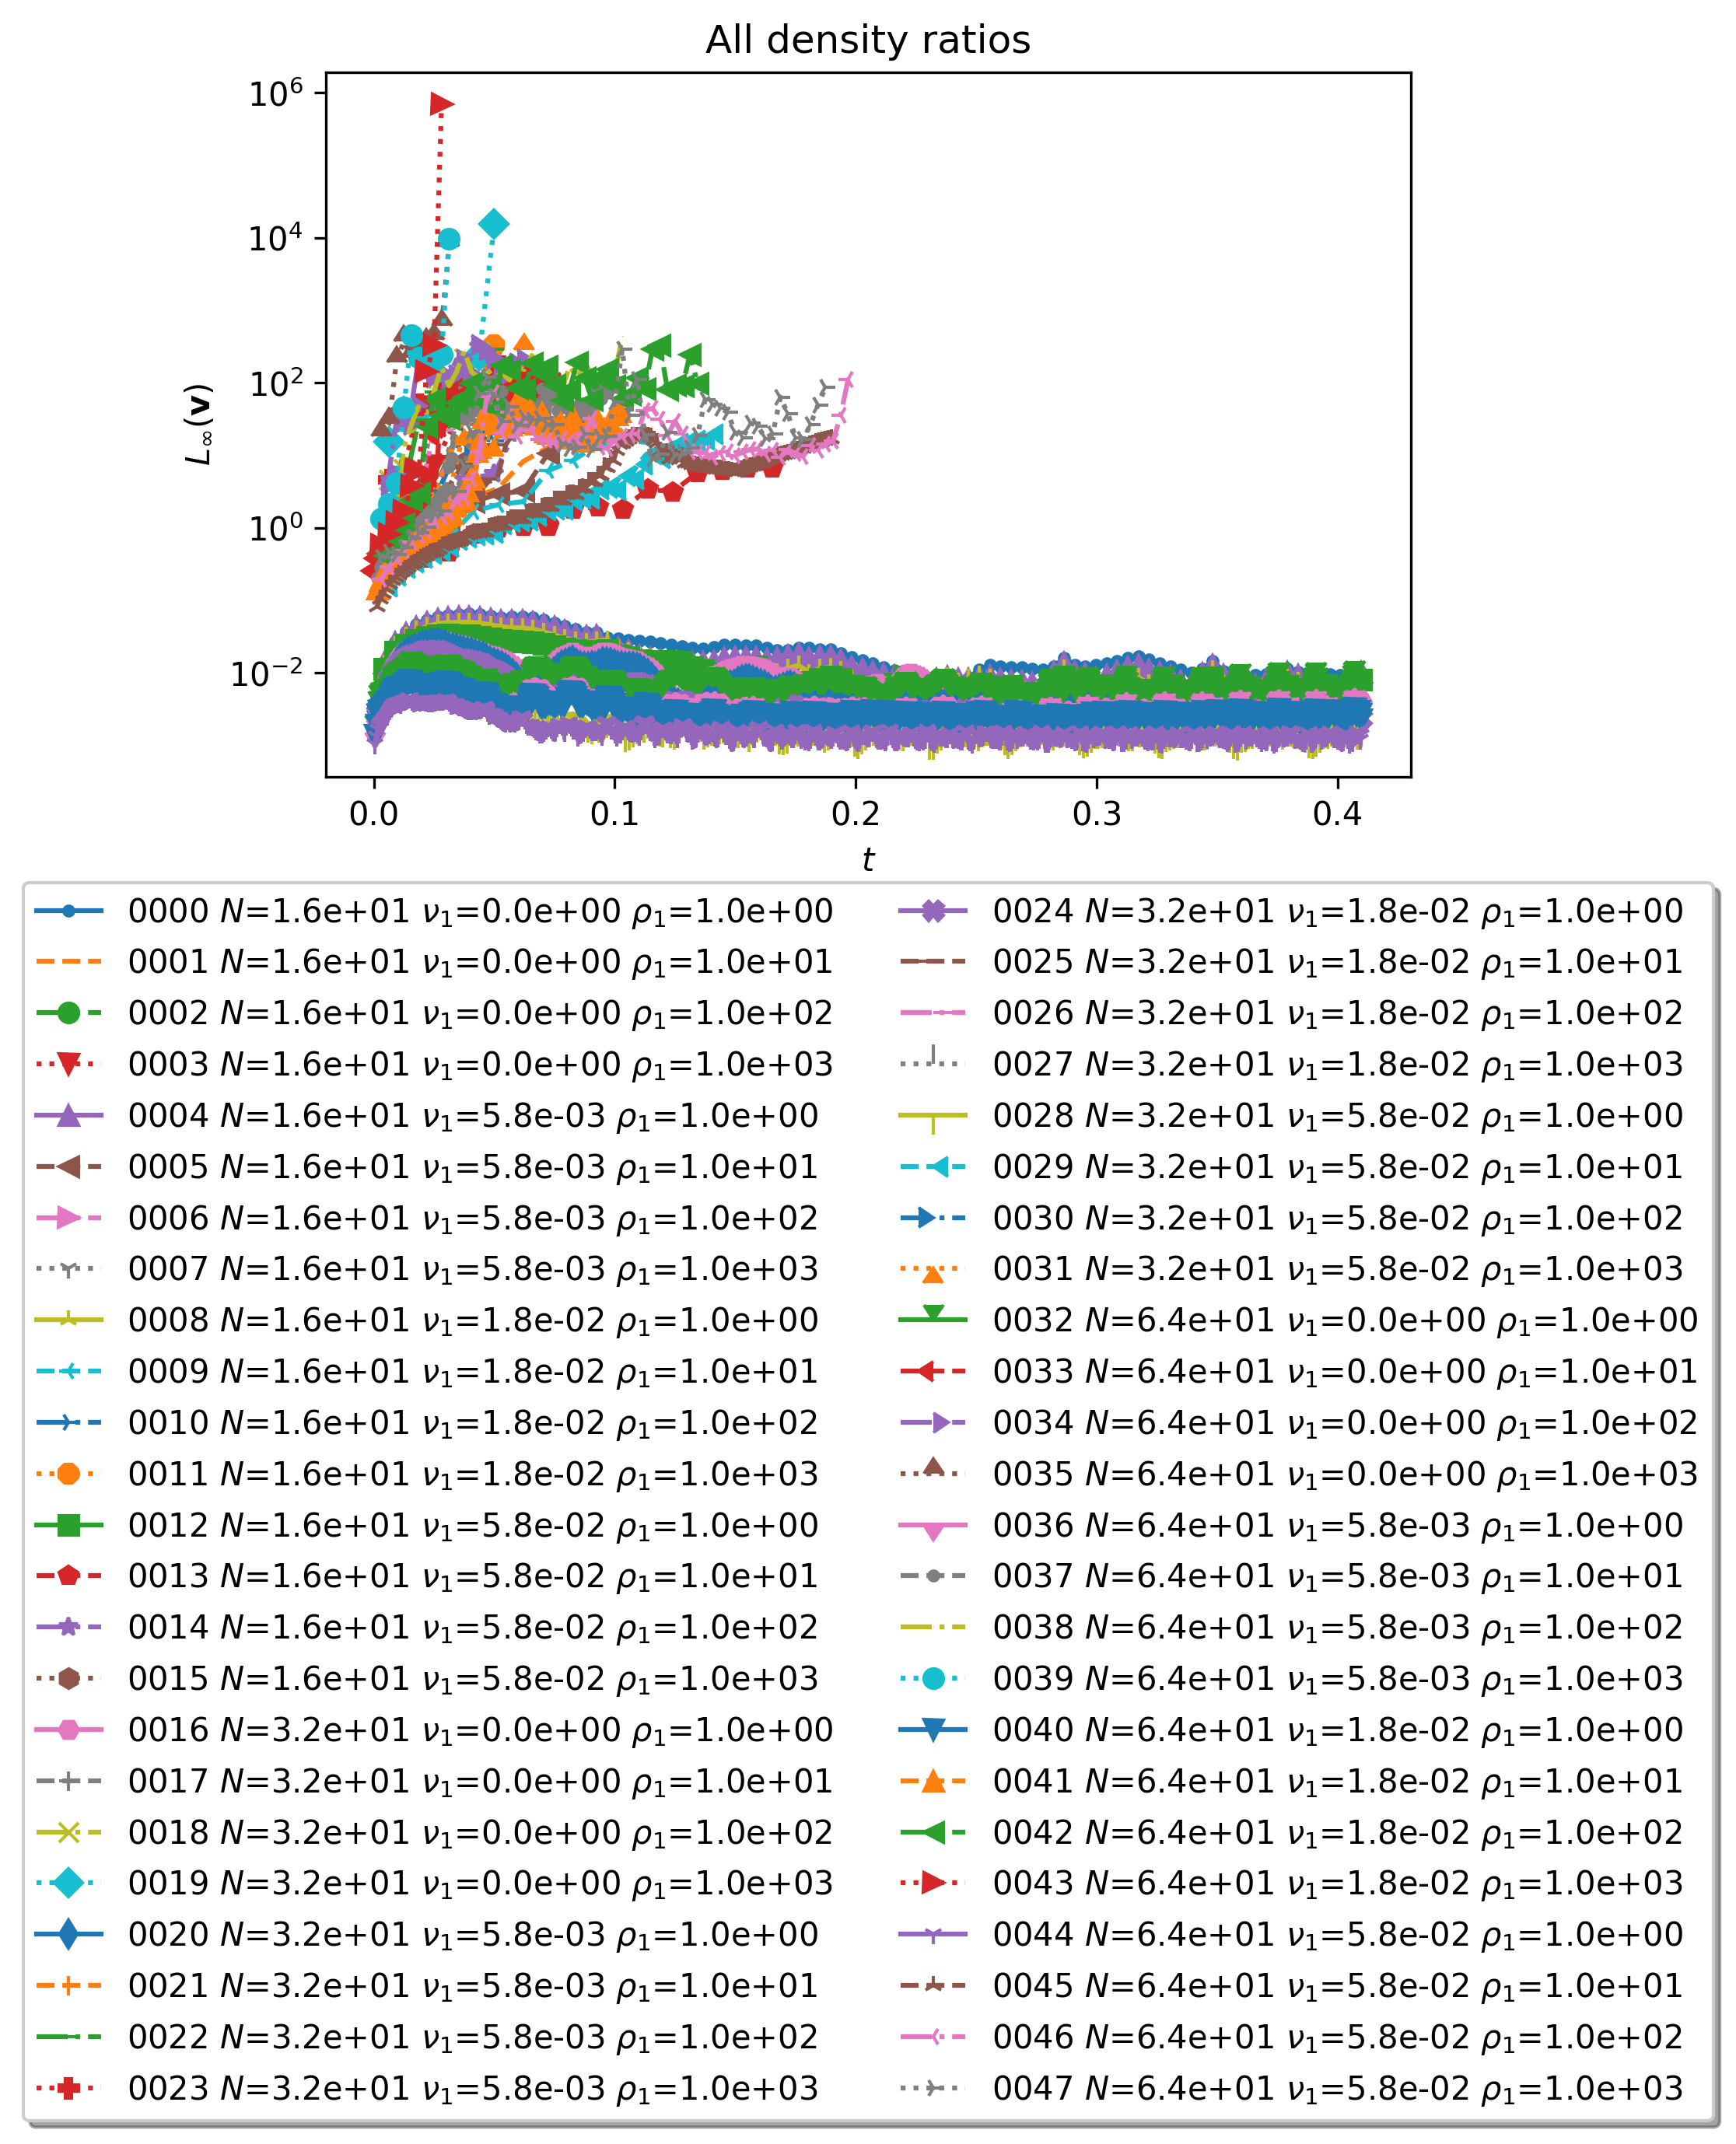

In [30]:
popinet2009_plot("noRhoEquation/noMomentumPredictor/limitedLinearV0.5/")

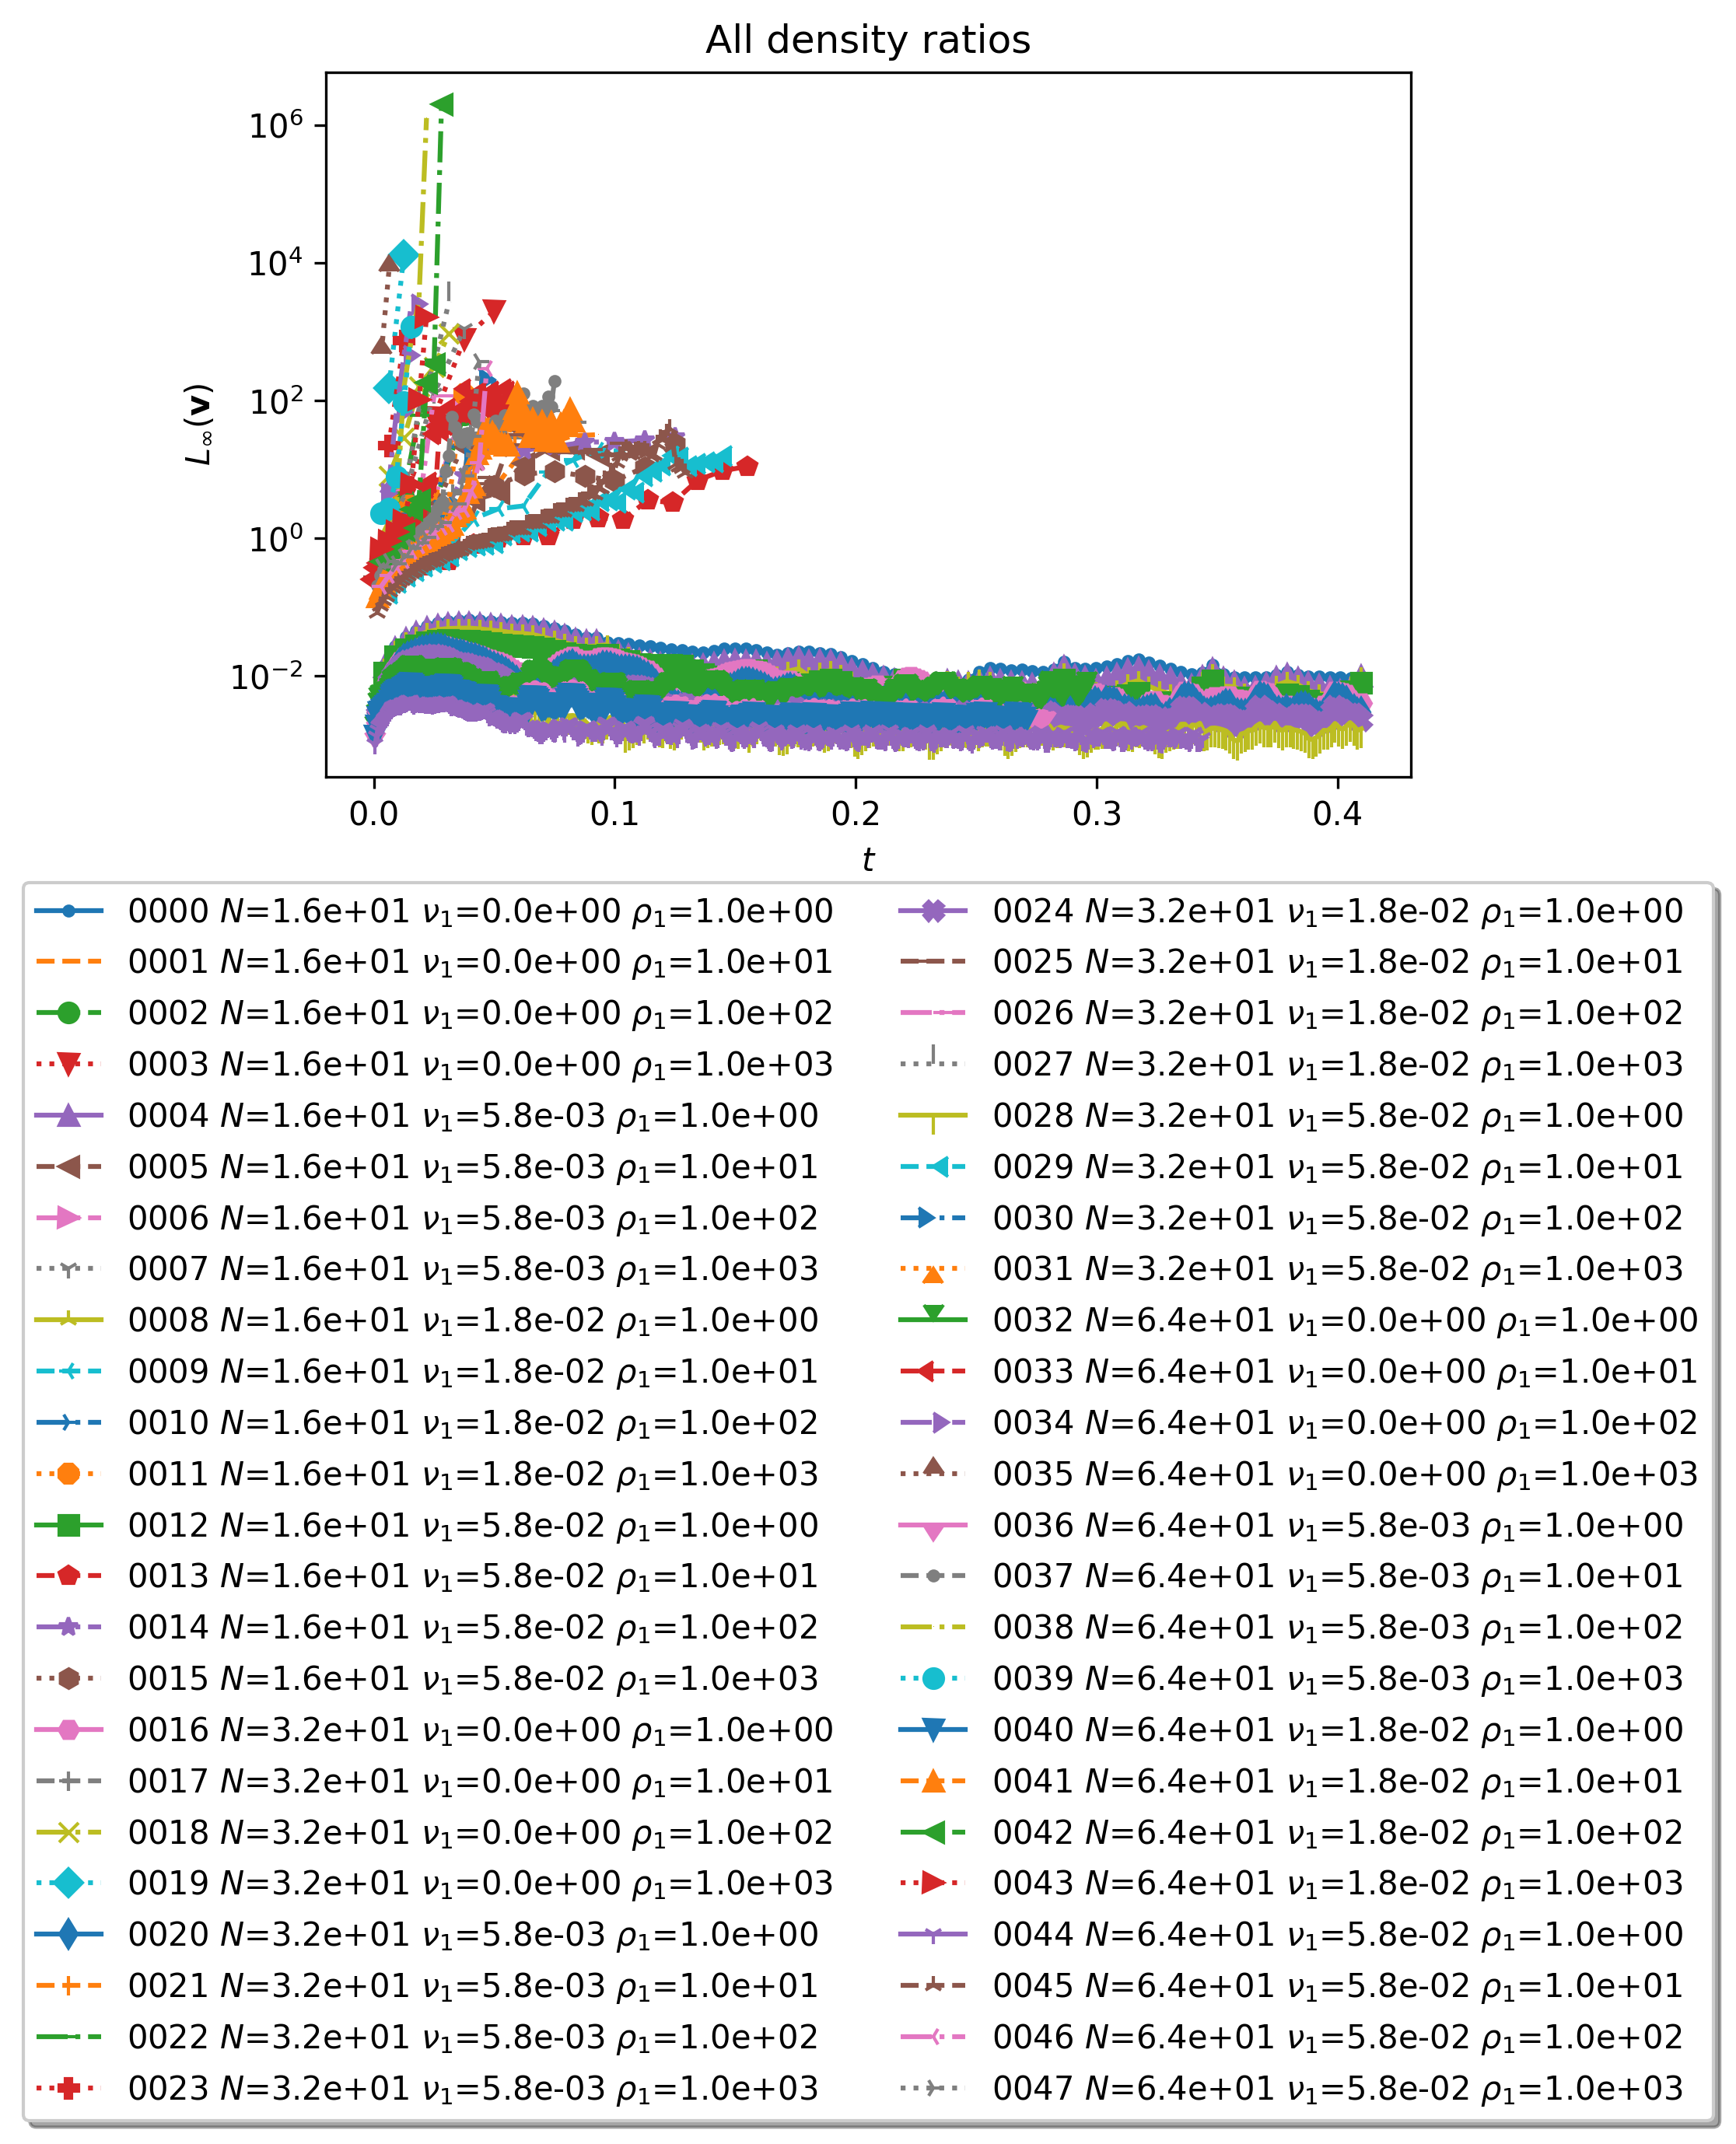

In [32]:
popinet2009_plot("noRhoEquation/noMomentumPredictor/limitedLinearV0/")

In [ ]:
rcParams["figure.dpi"] = 300
study_name = "popinet2009.parameter"
case_path = "lentVariableTimeStep/k_cfl_0.2/"
case_0_path = case_path + study_name + "_00000_template_copy_block"
popinet2009_agglom  = datglom.data_agglomerator(study_name, 
                                                  case_0_path,
                                                  "stationaryDropletResults.csv") 
 
popinet2009_df = popinet2009_agglom.study_dataframe() 
plotDict={"x" : "time", "xsymb" : r"$t$", 
          "y" : "Linf velocity error", 
          "ysymb" : r"$L_\infty(\mathbf{v})$",
          "resolution" : r"$N$", "rho_droplet" : r"$\rho_1$", 
          "nu_droplet" : r"$\nu_1$"};
plot_dframe(popinet2009_df.loc[idx[[16,32,64],[0.057735],[1000],:]],
            popinet2009_agglom,
            "lentVariableTimeStep/k_cfl_0.2/",
            "popinet2009.parameter",
            title="Translating droplet N= all, density ratio = 1000", 
            plotDict=plotDict)
print(popinet2009_df.loc[idx[[32],[0.057735],[1000],:],'Linf velocity error'])

In [ ]:
# case_path = "withRhoEquation/withMomentumPredictor/limitedLinearV1/"
# study_name = "popinet2009.parameter"
# case_0_path = case_path + study_name + "_00000_template_copy_block"
# popinet2009_agglom  = datglom.data_agglomerator(study_name, 
#                                                  case_0_path,
#                                                   "stationaryDropletResults.csv") 
 
# popinet2009_df = popinet2009_agglom.study_dataframe()

# for re in [16,32,64]:
#     for nu in [0.057735, 0.018257, 0.0057735, 0.0]:
#         for rho in [1,10,100,1000]:
#             case = popinet2009_df.loc[idx[re,nu,rho]]
#             if case['Linf velocity error'].iloc[-1]<1:
#                 print('divergent cases: resolution = %s , viscosity = %s , density = %s'%(re, nu, rho))

## comparsion between new results and SAMMPLE results

In [ ]:
def plot_comparison(old_df, new_df, case_path):
    import matplotlib.pyplot as plt
    rcParams['figure.dpi'] = 200
    rcParams['font.size'] = 8
    import warnings

    def plot_format(resolution,case_path=''):
        """Plots the L_inf(v) error and compares the old_df with new_df for all Laplace numbers for a 
        single mesh resolution."""

        # FIXME: We have to store the Laplace numbers and all other dimensionless numbers in the 
        #        secondary data, to prevent the need for listing them explicitly or re-calculating them.
        laplace_numbers = [120, 1200, 12000, "Inf"]
        viscosities =sorted(list(set(old_df["nu_droplet"])), reverse=True) 

        N = int(len(viscosities)**0.5)

        fig, ax = plt.subplots(2,2)

        for i,viscosity in enumerate(viscosities): 
            new_state = new_df.loc[idx[[resolution],[viscosity],:]]
            old_state = old_df.loc[(old_df['resolution']==resolution)&(old_df['nu_droplet']==viscosity)]
            row = int(i / N)
            col = int(i % N)
            ax[row,col].plot(new_state['time'], new_state['Linf velocity error'], label='new state')
            ax[row,col].plot(old_state['time'], old_state['Linf velocity error'], label='old state')
            ax[row,col].legend(loc='upper left')
            ax[row,col].set_title(r"$La\ =\ %s$" % laplace_numbers[i])
            ax[row,col].set_yscale('log')
            ax[row,col].set_ylabel('$L_\infty(\mathbf{v})$')
            ax[row,col].set_xlabel('Time $s$')
        
        
        fig.tight_layout()      
        fig.subplots_adjust(top=0.88)
        fig.suptitle("Translating droplet, $N_c$ = %s" % resolution)

# -------------------unsave/save figures----------------------------
#         split_n= case_path.split('/')
#         fig_name='Trans_popinet2009_comparsion_N%s' % resolution+'_'+split_n[0]+'_'+split_n[1]+'_'+split_n[2]
#         figures_path = os.environ['LENT_DENSITY_RATIO']
#         plt.savefig(os.path.join(figures_path,"%s.pdf"% fig_name))
#         plt.savefig('figures/%s.pdf'% fig_name)



    old_resolutions = list(set(old_df["resolution"]))
    old_resolutions.sort()
    new_resolutions = list(set(new_df.index.get_level_values("resolution")))
    new_resolutions.sort()
    resolutions = old_resolutions


    if (old_resolutions != new_resolutions): 
        print("Resolutions available in the old data set = ", old_resolutions)
        print("Resolutions available in the new data set = ", new_resolutions)    
        warnings.warn("Old and new mesh resolutions are not equal, comparing the shorter resolution list!")

        if (len(old_resolutions) > len(new_resolutions)):
            resolutions = new_resolutions

    for resolution in resolutions:
        plot_format(resolution, case_path=case_path)
        
        
        
def popinet2009_comparsion(case_path):
    old_state_df = pd.read_csv('notebook-data/saamplePaperConfig_translatingDroplet_popinet2009.csv', header = 1 ) 
    
    rcParams["figure.dpi"] = 200
    popinet_2009_agglom  = datglom.data_agglomerator("popinet2009.parameter", 
                                                  "%s/popinet2009.parameter_00000_template_copy_block"% case_path,
                                                  "stationaryDropletResults.csv") 

    popinet_2009_df = popinet_2009_agglom.study_dataframe() 
    new_df=popinet_2009_df.loc[idx[[16,32,64],:,[1],:]]
    plot_comparison(old_state_df, new_df, case_path)

In [ ]:
# rcParams["figure.dpi"] = 200

# plot_dframe(popinet_2009_df.loc[idx[[16],:,[1],:]],
#             popinet_2009_agglom,
#             title="Translating droplet N=16, density ratio = 1", 
#             plotDict=plotDict)

In [ ]:
# rcParams["figure.dpi"] = 200
# plot_dframe(popinet_2009_df.loc[idx[[64],:,[1],:]],
#             popinet_2009_agglom,
#             title="Translating droplet N=64, density ratio = 1", 
#             plotDict=plotDict)

In [ ]:
# rcParams["figure.dpi"] = 200
# idx = pd.IndexSlice
# plot_dframe(popinet_2009_df.loc[idx[[16],:,[1000],:]],
#             popinet_2009_agglom,
#             title="Translating droplet N=16, density ratio = 1000", 
#             plotDict=plotDict)

In [ ]:
# rcParams["figure.dpi"] = 200
# idx = pd.IndexSlice
# plot_dframe(popinet_2009_df.loc[idx[[64],:,[1000],:]],
#             popinet_2009_agglom,
#             title="Translating droplet N=64, density ratio = 1000", 
#             plotDict=plotDict)

In [ ]:
      
# plot_comparison(old_state_df, popinet_2009_df.loc[idx[[16,32,64],:,[1],:]])